In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn as sns
import warnings
from scipy.stats import spearmanr
from tools import *
import array_to_latex

%matplotlib inline

warnings.filterwarnings('ignore')

## Distribution of P(active) values for each position

In [2]:
path = '../data_preparation/1_data_cleaning_and_formatting/scripts/total_compounds.csv'

In [3]:
total_compounds = pd.read_csv(path).drop(columns=['Unnamed: 0'])
display(total_compounds.head(5))
print(len(total_compounds))

,structure,read_count,bb1,bb2,bb3
0,CN(Cc1c(F)ccc(Cl)c1F)C(=O)CCn1ccc(C(=O)NCCC(c2...,172,NCC1=C(F)C(Cl)=CC=C1F,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1
1,CN(CCOc1ccccc1)C(=O)CC1CCC(C(=O)NCCC2CCCCCCC2)CC1,611,NCCOC1=CC=CC=C1,C1CC(CCC1CC(=O)O)C(=O)O,NCCC1CCCCCCC1
2,CCCCCCN(C)C(=O)c1cc(C)c(OCC(=O)NCCC(c2ccc(F)cc...,1401,CCCCCCN,Cc1cc(cc(c1OCC(=O)O)C)C(=O)O,NCCC(C1=CC=C(F)C=C1)C1=CC=CO1
3,CCOc1cccc(CCNC(=O)c2csc3cc(C(=O)N(C)Cc4cc(F)cc...,86,NCC1=C(Cl)C=CC(F)=C1,c1c2c(c(cs2)C(=O)O)sc1C(=O)O,CCOC1=CC=CC(CCN)=C1
4,CNC(=O)[C@H](Cc1cccc(OC)c1)NC(=O)[C@H]1CC[C@H]...,380,COc1cccc(c1)C[C@@H](C(=O)O)N,O=C(O)[C@H]1CC[C@H](C(=O)O)CC1,NCCC(C1=CC=C(F)C=C1)C1=CC=CO1


4849300


In [4]:
bb1_pactive = calc_pactive(total_compounds, bb_pos='bb1')
bb2_pactive = calc_pactive(total_compounds, bb_pos='bb2')
bb3_pactive = calc_pactive(total_compounds, bb_pos='bb3')

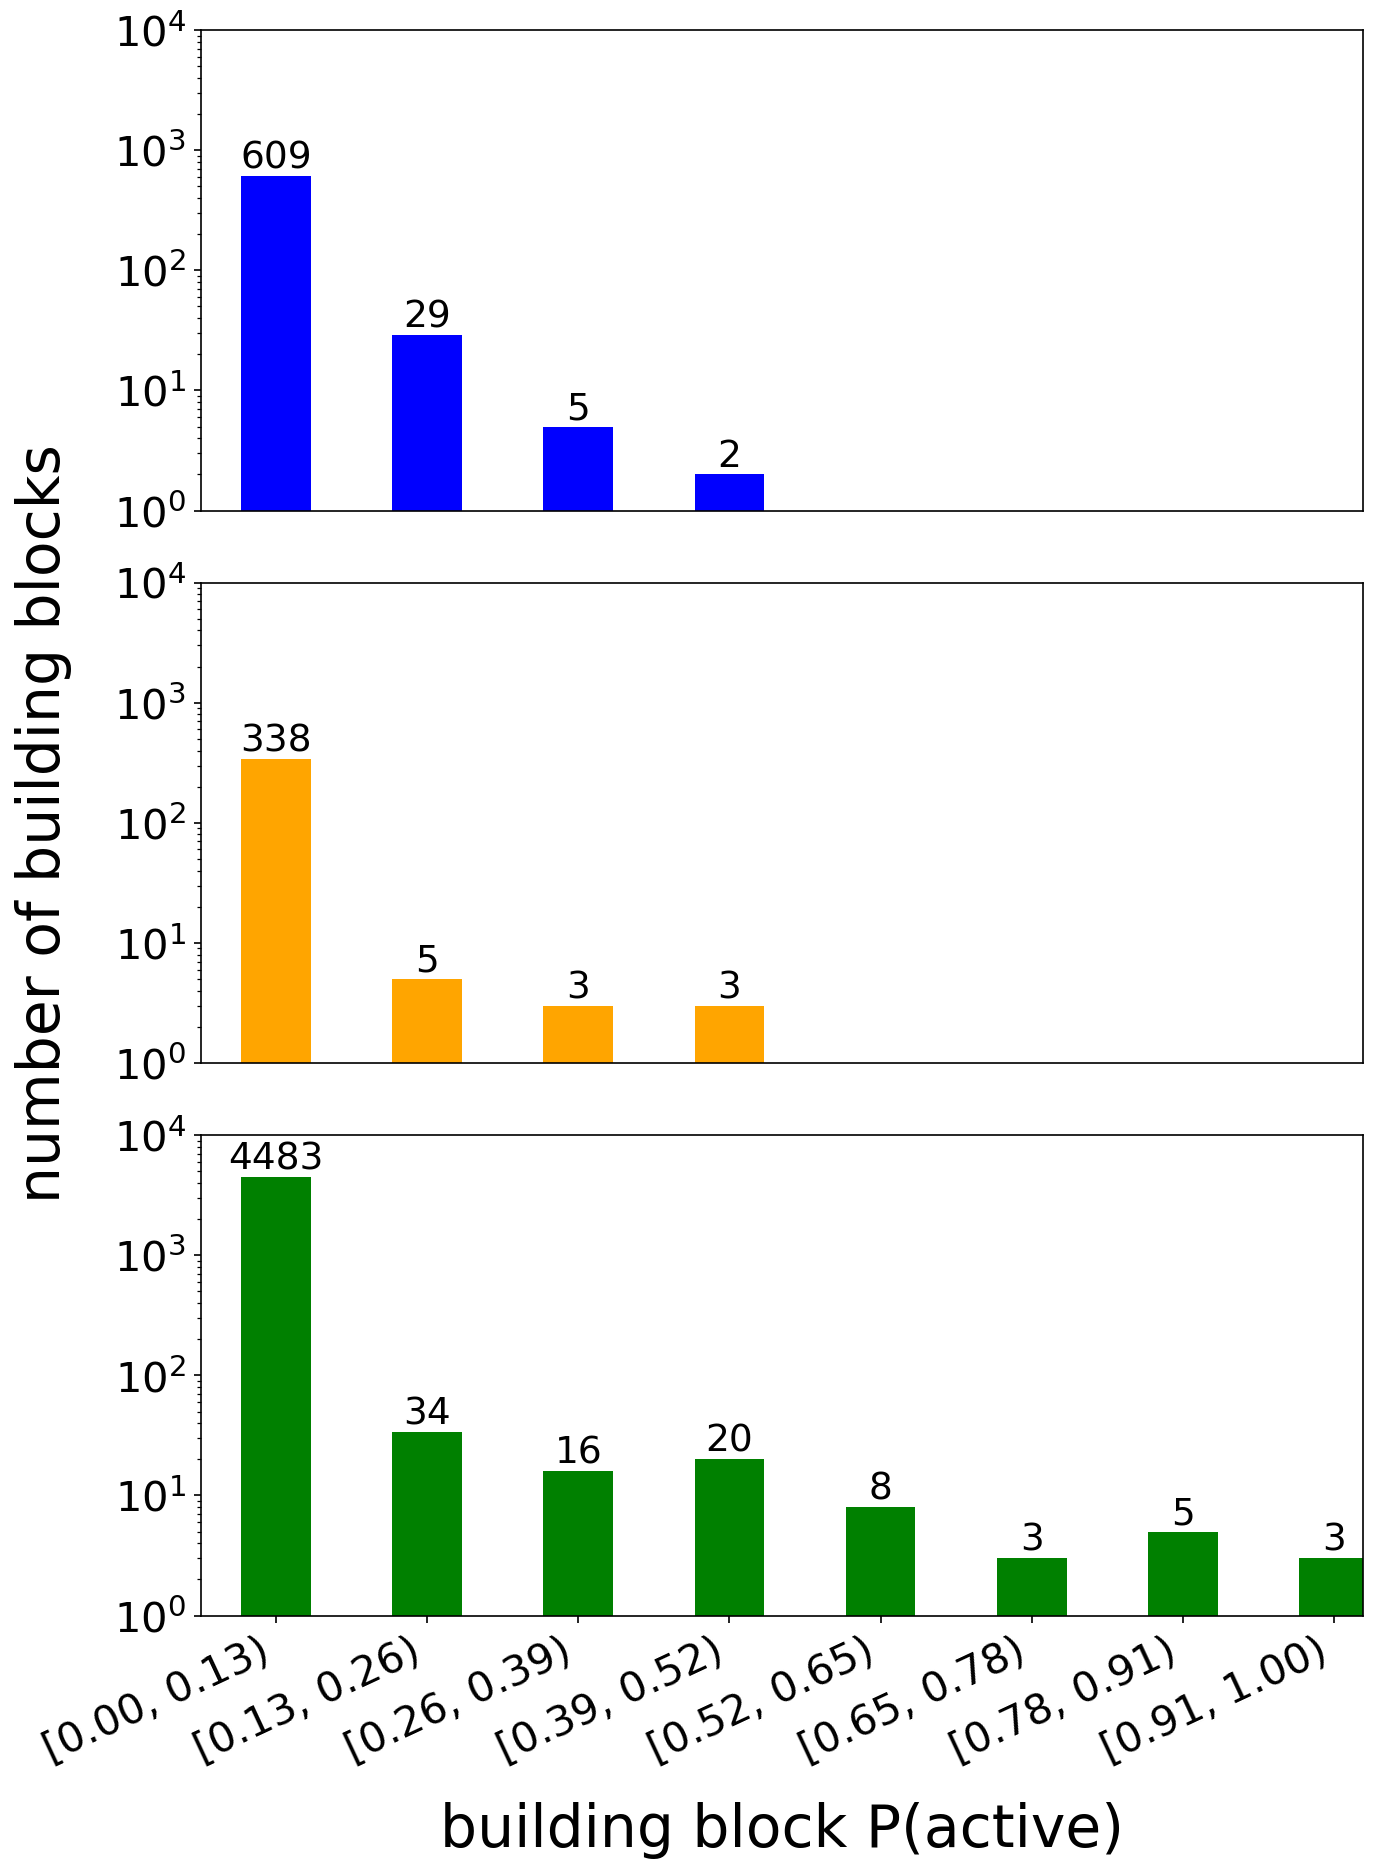

In [5]:
a_bars, b_bars, c_bars = plot_pactive(bb1_pactive, bb2_pactive, bb3_pactive)

### SI Figure 1: Relative Sampling of each Building Block

In [6]:
bb1_counts = total_compounds.groupby(['bb1'], as_index=False)['structure'].nunique()
bb2_counts = total_compounds.groupby(['bb2'], as_index=False)['structure'].nunique()
bb3_counts = total_compounds.groupby(['bb3'], as_index=False)['structure'].nunique()

In [7]:
bb1_merged = bb1_pactive.merge(bb1_counts, on='bb1')
bb2_merged = bb2_pactive.merge(bb2_counts, on='bb2')
bb3_merged = bb3_pactive.merge(bb3_counts, on='bb3')

In [8]:
bb1_obs = bb1_merged.sort_values(by='structure')
bb2_obs = bb2_merged.sort_values(by='structure')
bb3_obs = bb3_merged.sort_values(by='structure')

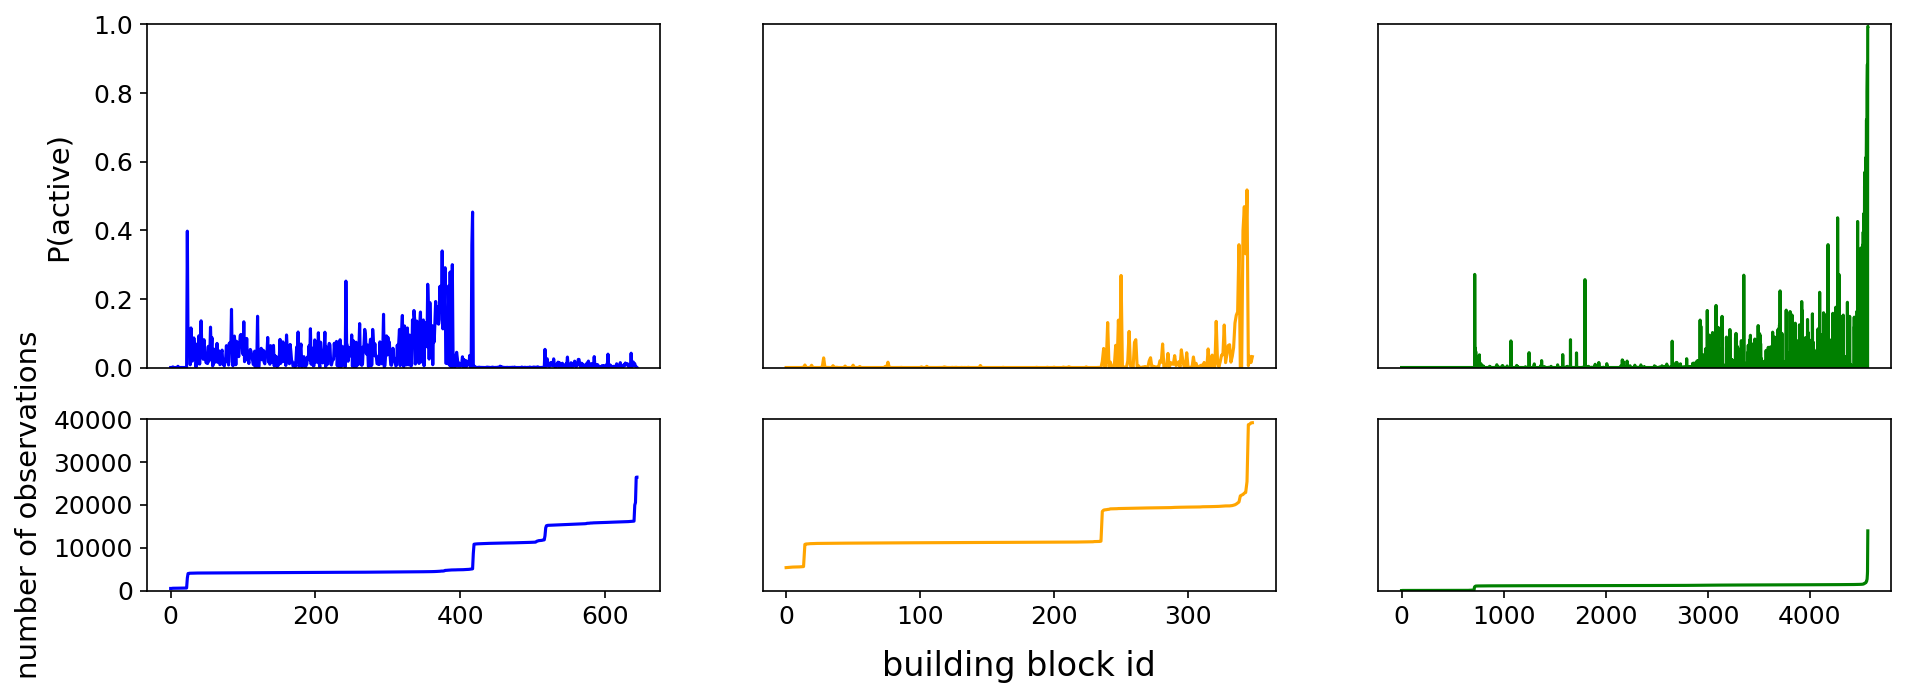

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(15,5), dpi=150, sharex=False, sharey=False, gridspec_kw={'height_ratios': [2, 1]})
labelpad=5
lfs=14

axs[0][0].plot(np.arange(len(bb1_obs['bb1'])), bb1_obs['P(active)'], color='blue')
axs[0][1].plot(np.arange(len(bb2_obs['bb2'])), bb2_obs['P(active)'], color='orange')
axs[0][2].plot(np.arange(len(bb3_obs['bb3'])), bb3_obs['P(active)'], color='green')


axs[0][0].set_xticks([])
axs[0][0].set_ylim([0, 1.0])
axs[0][0].tick_params(labelsize=lfs-2)
axs[0][1].set_ylim([0, 1.0])
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][2].set_ylim([0, 1.0])
axs[0][2].set_xticks([])
axs[0][2].set_yticks([])


#axs[1][0].set_yscale("log")
axs[1][0].set_yticks(np.array([0, 10000, 20000, 30000, 40000]))
axs[1][0].plot(np.arange(len(bb1_obs['bb1'])), bb1_obs['structure'], color='blue')
axs[1][1].plot(np.arange(len(bb2_obs['bb2'])), bb2_obs['structure'], color='orange')
axs[1][2].plot(np.arange(len(bb3_obs['bb3'])), bb3_obs['structure'], color='green')

axs[1][0].set_ylim([0, 40000])
axs[1][0].tick_params(axis='both', which='major', labelsize=lfs-2)
axs[1][1].set_ylim([0, 40000])
axs[1][1].set_yticks([])
axs[1][1].tick_params(axis='both', which='major', labelsize=lfs-2)
axs[1][2].set_ylim([0, 40000])
axs[1][2].set_yticks([])
axs[1][2].tick_params(axis='both', which='major', labelsize=lfs-2)

axs[0][0].set_ylabel('P(active)', labelpad=labelpad+5, fontsize=lfs)
axs[1][0].set_ylabel('number of observations', labelpad=labelpad, fontsize=lfs)
axs[1][1].set_xlabel('building block id', labelpad=labelpad+5, fontsize=lfs+2)
plt.show()
#fig.savefig('figures/images/n_obs.png')

In [11]:
print(spearmanr(bb1_obs['P(active)'], bb1_obs['structure']))
print(spearmanr(bb2_obs['P(active)'], bb2_obs['structure']))
print(spearmanr(bb3_obs['P(active)'], bb3_obs['structure']))

SpearmanrResult(correlation=-0.38504588338303475, pvalue=3.1770738449044245e-24)
SpearmanrResult(correlation=0.5504195895804319, pvalue=4.9314613175268393e-29)
SpearmanrResult(correlation=0.4535837361308242, pvalue=6.79088839961887e-231)


### Visualize top P(active) building blocks at each position

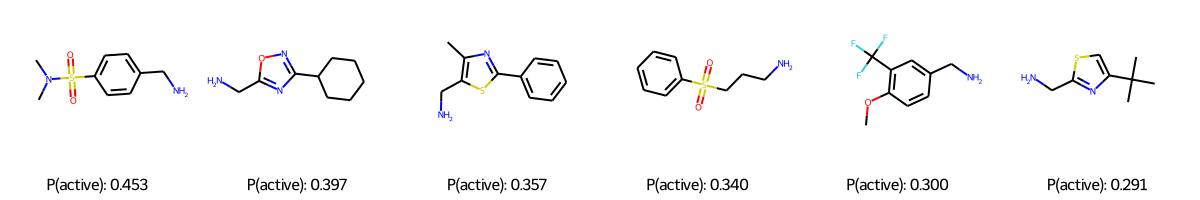

In [12]:
view_top_bbs(bb1_pactive, bb_pos="bb1", N=6)

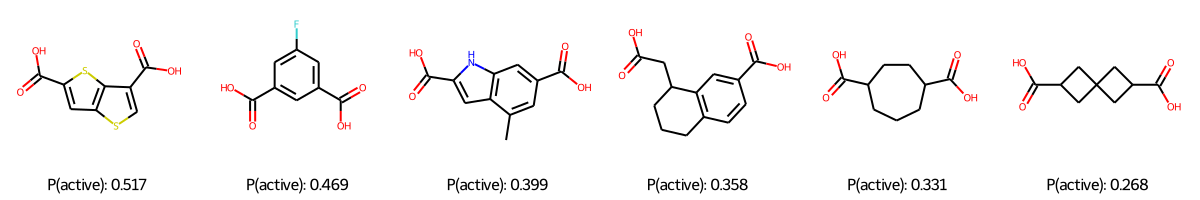

In [13]:
view_top_bbs(bb2_pactive, bb_pos="bb2", N=6)

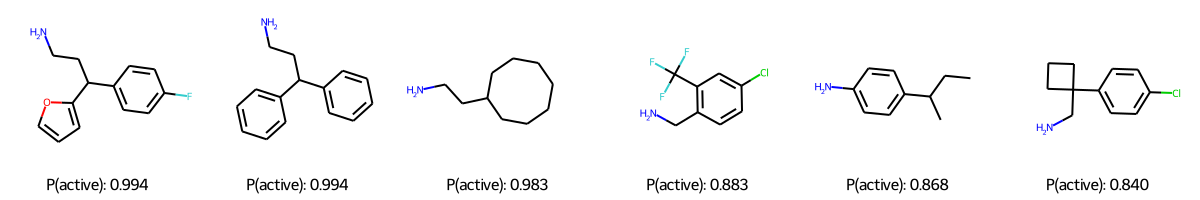

In [14]:
view_top_bbs(bb3_pactive, bb_pos="bb3", N=6)

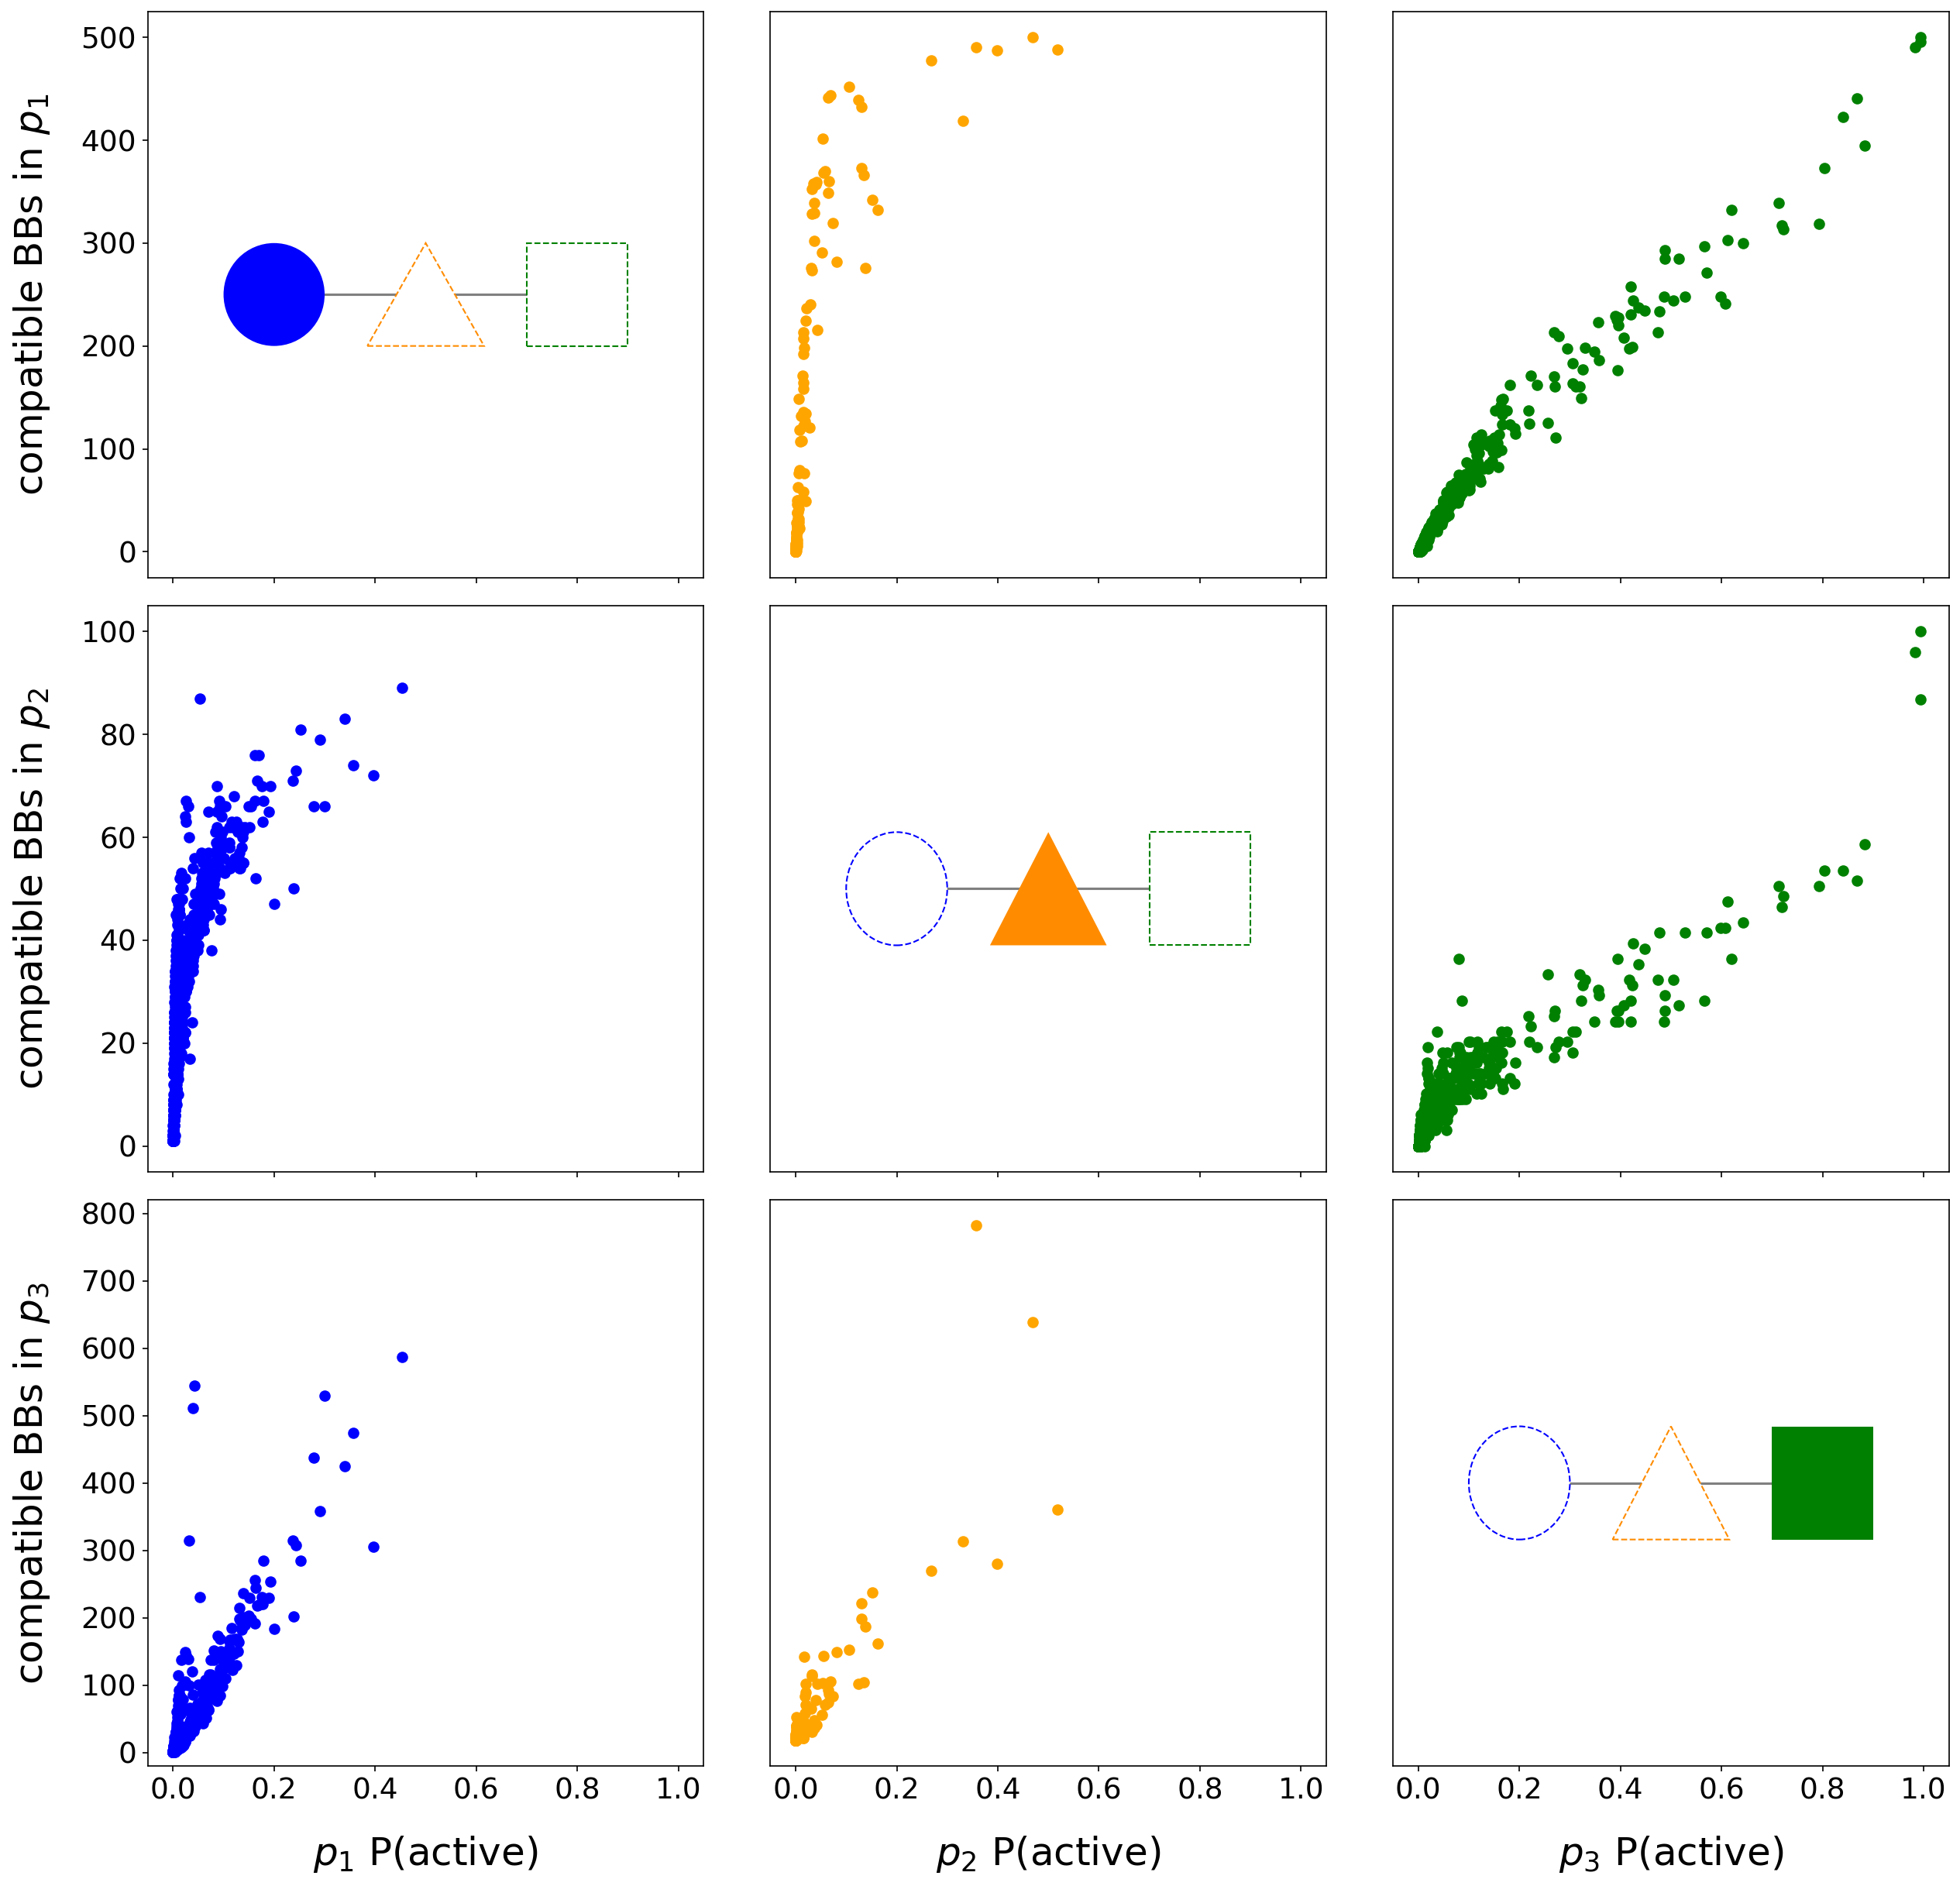

In [15]:
total_merged = merge_df(total_compounds, bb1_pactive, bb2_pactive, bb3_pactive)
actives = get_actives(total_merged)
D_12, D_13, D_21, D_23, D_31, D_32 = plot_compatible(actives)

In [16]:
# Correlation values going rowwise
val = np.zeros((3,3))
val[0][1] = spearmanr(D_21['P(active)_2'], D_21['bb1'])[0]
val[0][2] = spearmanr(D_31['P(active)_3'], D_31['bb1'])[0]
val[1][0] = spearmanr(D_12['P(active)_1'], D_12['bb2'])[0]
val[1][2] = spearmanr(D_32['P(active)_3'], D_32['bb2'])[0]
val[2][0] = spearmanr(D_13['P(active)_1'], D_13['bb3'])[0]
val[2][1] = spearmanr(D_23['P(active)_2'], D_23['bb3'])[0]
array_to_latex.to_ltx(val, frmt='{:.4f}', arraytype='tabular')

\begin{tabular}
  0.0000 &  0.9724 &  0.9860\\
  0.9042 &  0.0000 &  0.9376\\
  0.9035 &  0.9037 &  0.0000
\end{tabular}


### View 2D bins

In [17]:
bb1_pactive = apply_bins(bb1_pactive, bb_pos='bb1')
bb2_pactive = apply_bins(bb2_pactive, bb_pos='bb2')
bb3_pactive = apply_bins(bb3_pactive, bb_pos='bb3')

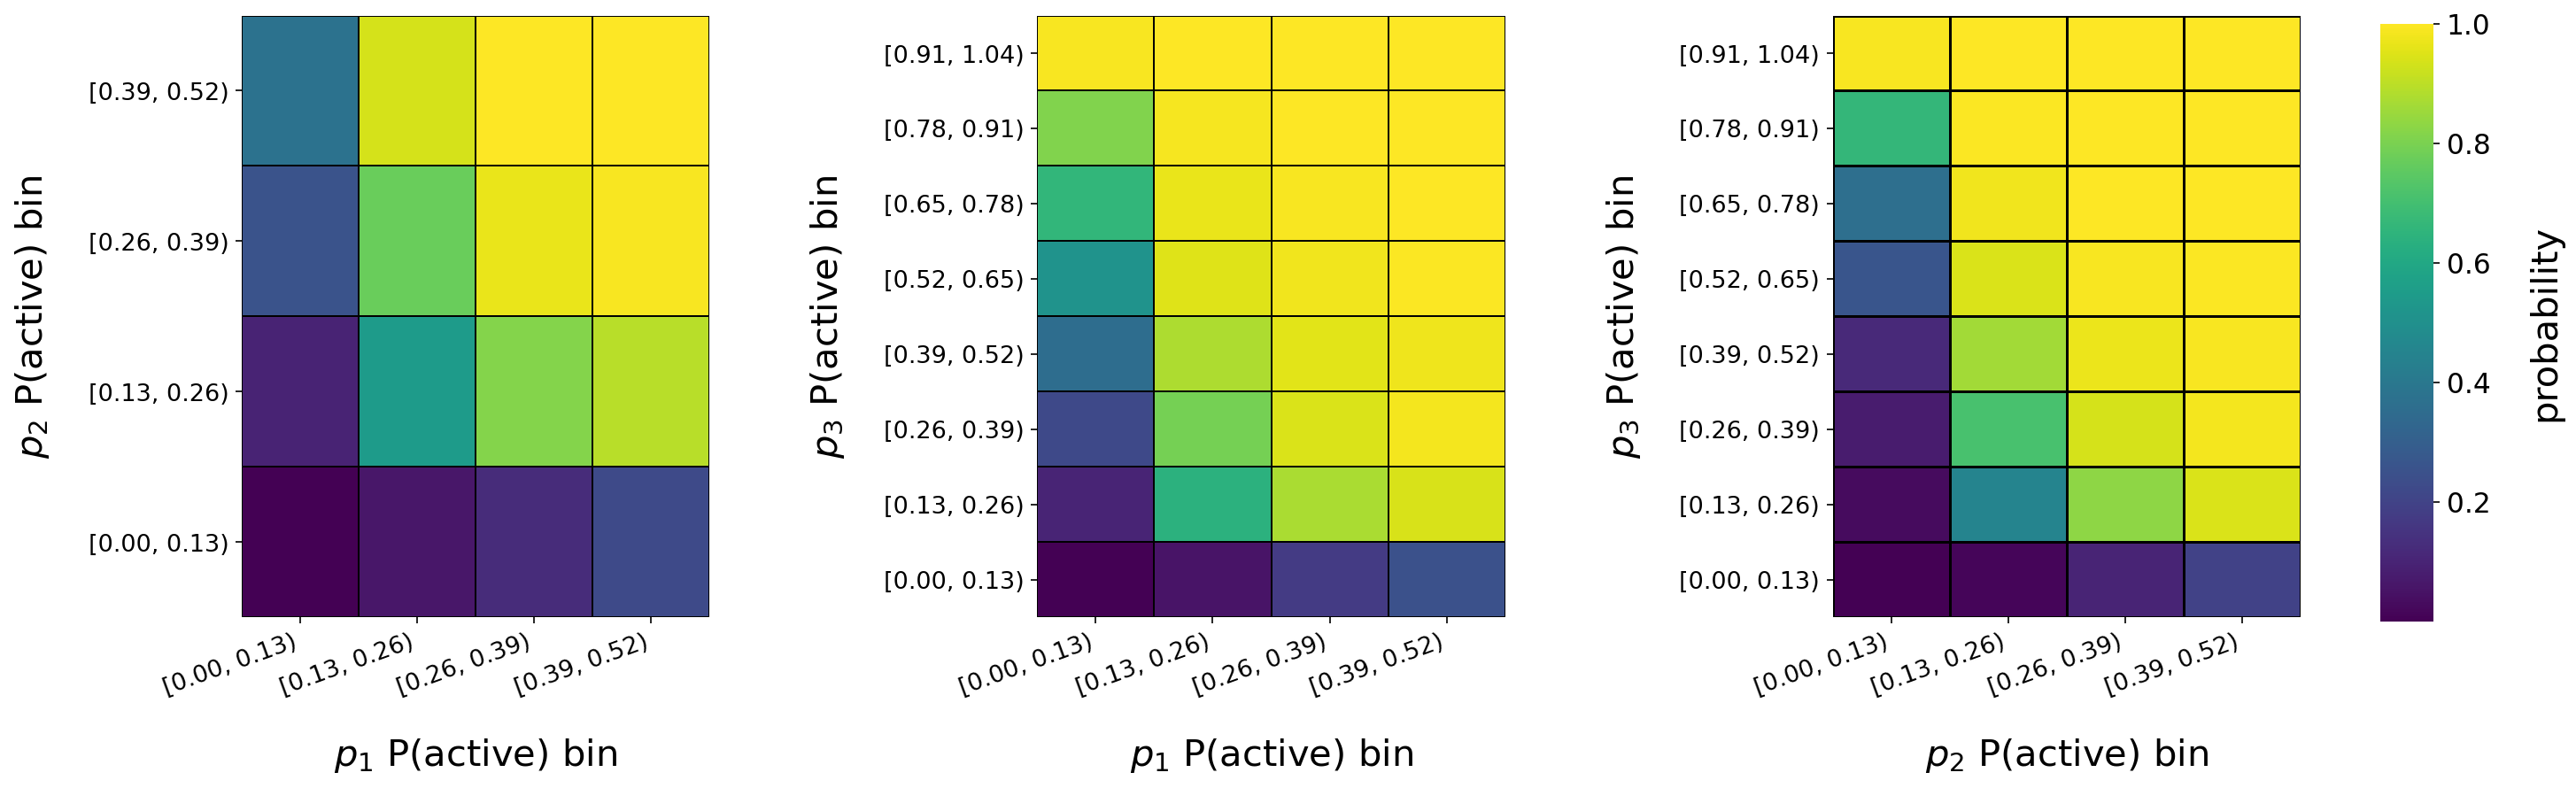

In [18]:
total_bins = merge_df(total_compounds, bb1_pactive, bb2_pactive, bb3_pactive)
bins_1_2, bins_1_3, bins_2_3 = plot_2D_bins(total_bins, bb1_pactive, bb2_pactive, bb3_pactive)

In [19]:
#array_to_latex.to_ltx(bins_1_2, frmt='{:.4f}', arraytype='tabular')
#array_to_latex.to_ltx(bins_1_3, frmt='{:.4f}', arraytype='tabular')
#array_to_latex.to_ltx(bins_2_3, frmt='{:.4f}', arraytype='tabular')

\begin{tabular}
  0.3738 &  0.9148 &  0.9789 &  0.9771\\
  0.2546 &  0.7576 &  0.9467 &  0.9684\\
  0.0988 &  0.5353 &  0.7981 &  0.8742\\
  0.0063 &  0.0637 &  0.1256 &  0.2244
\end{tabular}
\begin{tabular}
  0.9903 &  1.0000 &  1.0000 &  1.0000\\
  0.8121 &  0.9878 &  1.0000 &  1.0000\\
  0.6593 &  0.9677 &  0.9898 &  1.0000\\
  0.5137 &  0.9511 &  0.9787 &  0.9959\\
  0.3555 &  0.8761 &  0.9565 &  0.9737\\
  0.2220 &  0.7900 &  0.9417 &  0.9833\\
  0.0991 &  0.6373 &  0.8728 &  0.9385\\
  0.0014 &  0.0547 &  0.1769 &  0.2501
\end{tabular}
\begin{tabular}
  0.9885 &  1.0000 &  1.0000 &  1.0000\\
  0.6615 &  0.9942 &  0.9986 &  0.9981\\
  0.3610 &  0.9781 &  0.9992 &  1.0000\\
  0.2660 &  0.9439 &  0.9913 &  0.9953\\
  0.1150 &  0.8632 &  0.9725 &  0.9900\\
  0.0778 &  0.7104 &  0.9372 &  0.9835\\
  0.0280 &  0.4518 &  0.8305 &  0.9442\\
  0.0006 &  0.0138 &  0.0991 &  0.1968
\end{tabular}


### Import distance matrix from Tanimoto values

In [20]:
bb1_dist_2D = np.load('../data_preparation/output/bb1_dist_2D.npy')
bb2_dist_2D = np.load('../data_preparation/output/bb2_dist_2D.npy')
bb3_dist_2D = np.load('../data_preparation/output/bb3_dist_2D.npy')

In [21]:
bb1_dist_3D = np.load('../data_preparation/output/bb1_dist_3D.npy')
bb2_dist_3D = np.load('../data_preparation/output/bb2_dist_3D.npy')
bb3_dist_3D = np.load('../data_preparation/output/bb3_dist_3D.npy')

### Plot distribution of 2D and 3D distances

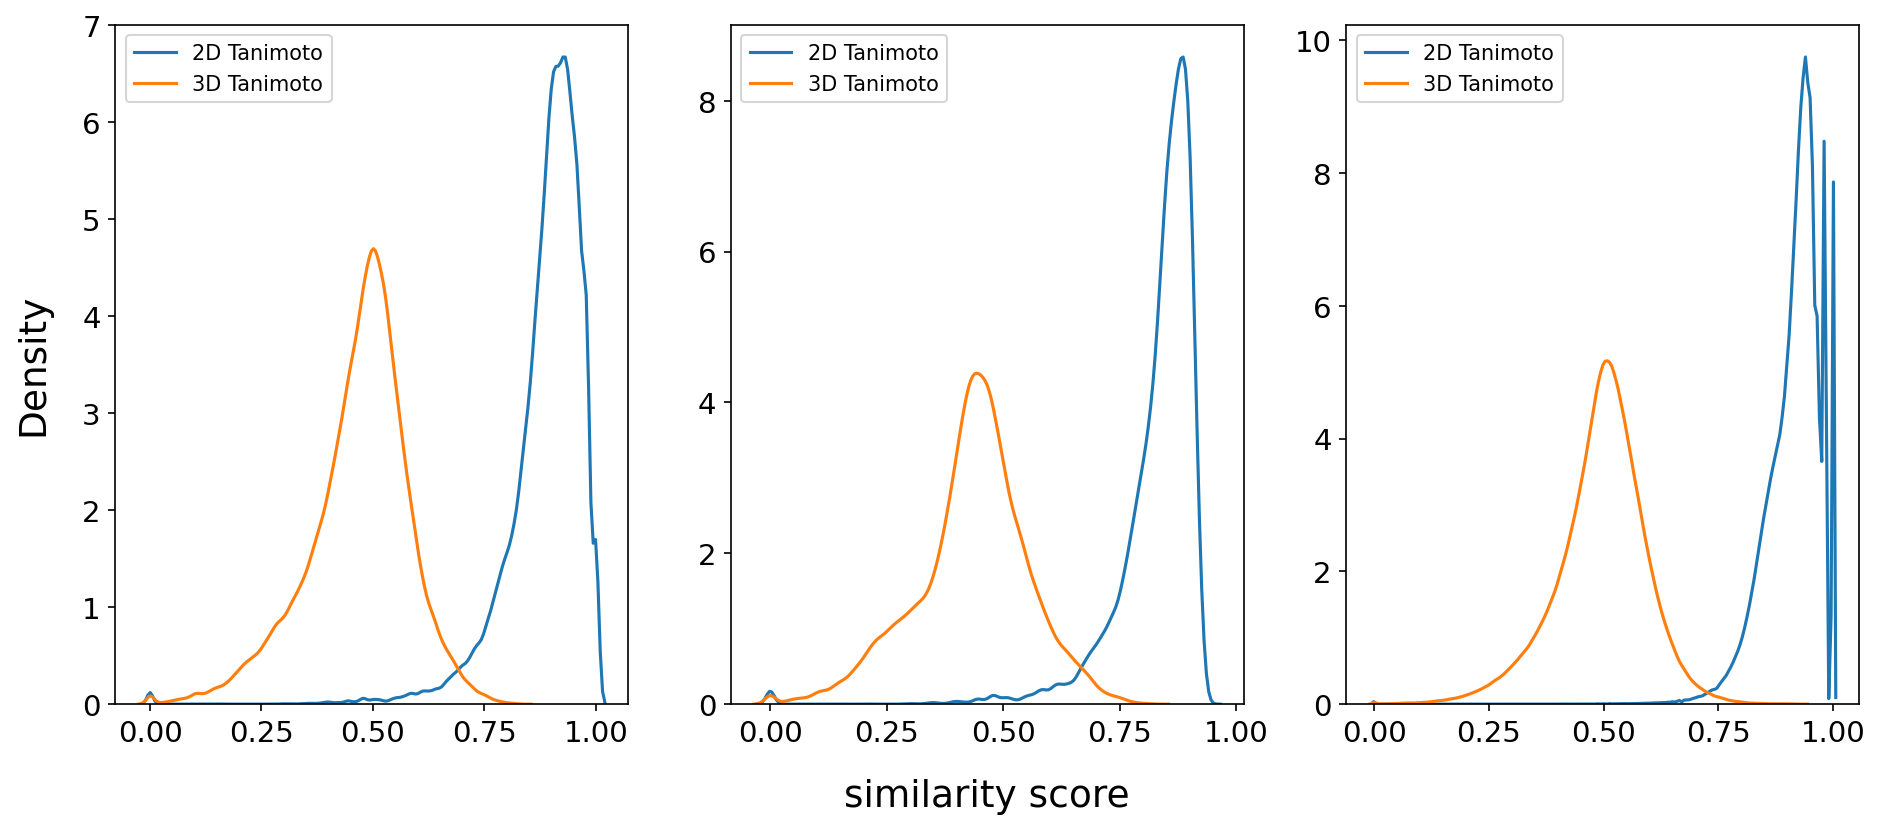

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15,6), dpi=150)
sns.kdeplot(bb1_dist_2D.ravel(), label='2D Tanimoto', ax=axs[0])
sns.kdeplot(bb1_dist_3D.ravel()/2, label='3D Tanimoto', ax=axs[0])
axs[0].legend(loc='best')
axs[0].set_xlabel('')
axs[0].set_ylabel('Density', fontsize=18, labelpad=15)
axs[0].tick_params(labelsize=14)

sns.kdeplot(bb2_dist_2D.ravel(), label='2D Tanimoto', ax=axs[1])
sns.kdeplot(bb2_dist_3D.ravel()/2, label='3D Tanimoto', ax=axs[1])
axs[1].legend(loc='best')
axs[1].set_xlabel('similarity score', fontsize=18, labelpad=15)
axs[1].set_ylabel('')
axs[1].tick_params(labelsize=14)

sns.kdeplot(bb3_dist_2D.ravel(), label='2D Tanimoto', ax=axs[2])
sns.kdeplot(bb3_dist_3D.ravel()/2, label='3D Tanimoto', ax=axs[2])
axs[2].legend(loc='best')
axs[2].set_xlabel('')
axs[2].set_ylabel('')
axs[2].tick_params(labelsize=14)
#fig.savefig('../SI/figures/images/tanimoto_dist.png')

#### Map coordinates with UMAP

In [23]:
trans_bb1 = umap_transform(bb1_dist_3D)
trans_bb2 = umap_transform(bb2_dist_3D)
trans_bb3 = umap_transform(bb3_dist_3D)

,Position,top - top dist,top - rand dist
0,1,4.116311,8.253764
1,2,1.112908,7.820370
2,3,4.775215,10.763057


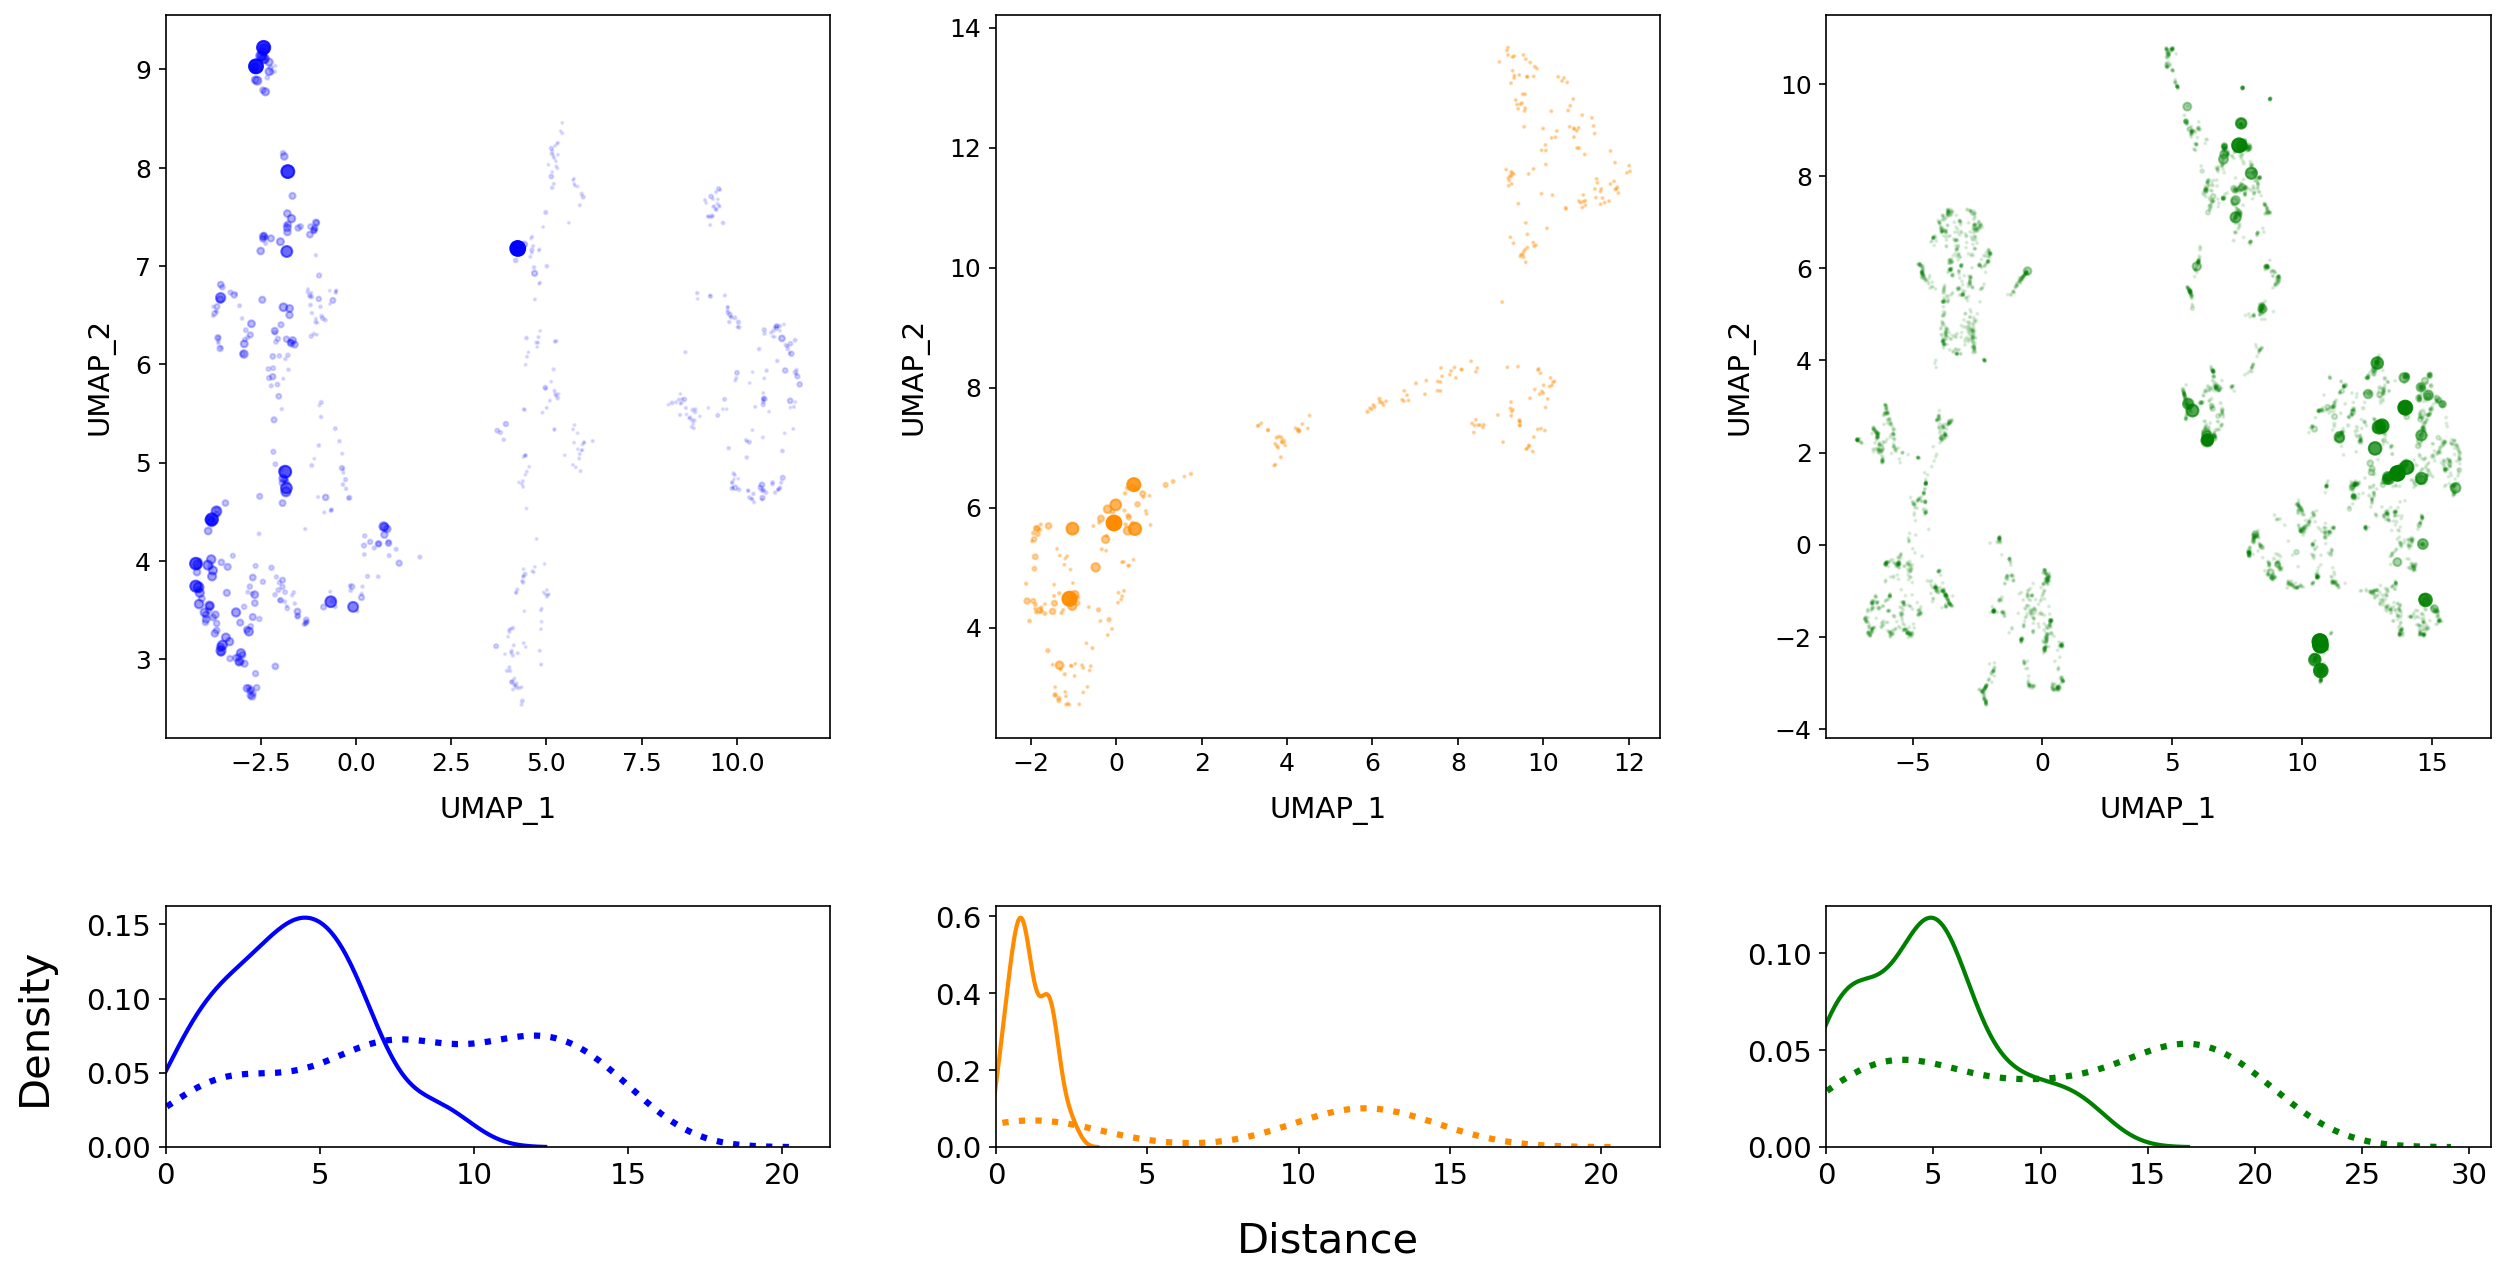

In [24]:
fig, bb1_pactive, bb2_pactive, bb3_pactive = plot_umap(bb1_pactive, bb2_pactive, bb3_pactive, trans_bb1, trans_bb2, trans_bb3)


### Same but with 2D Tanimoto

,Position,top - top dist,top - rand dist
0,1,5.825330,5.479385
1,2,6.828734,5.865181
2,3,5.349958,4.601449


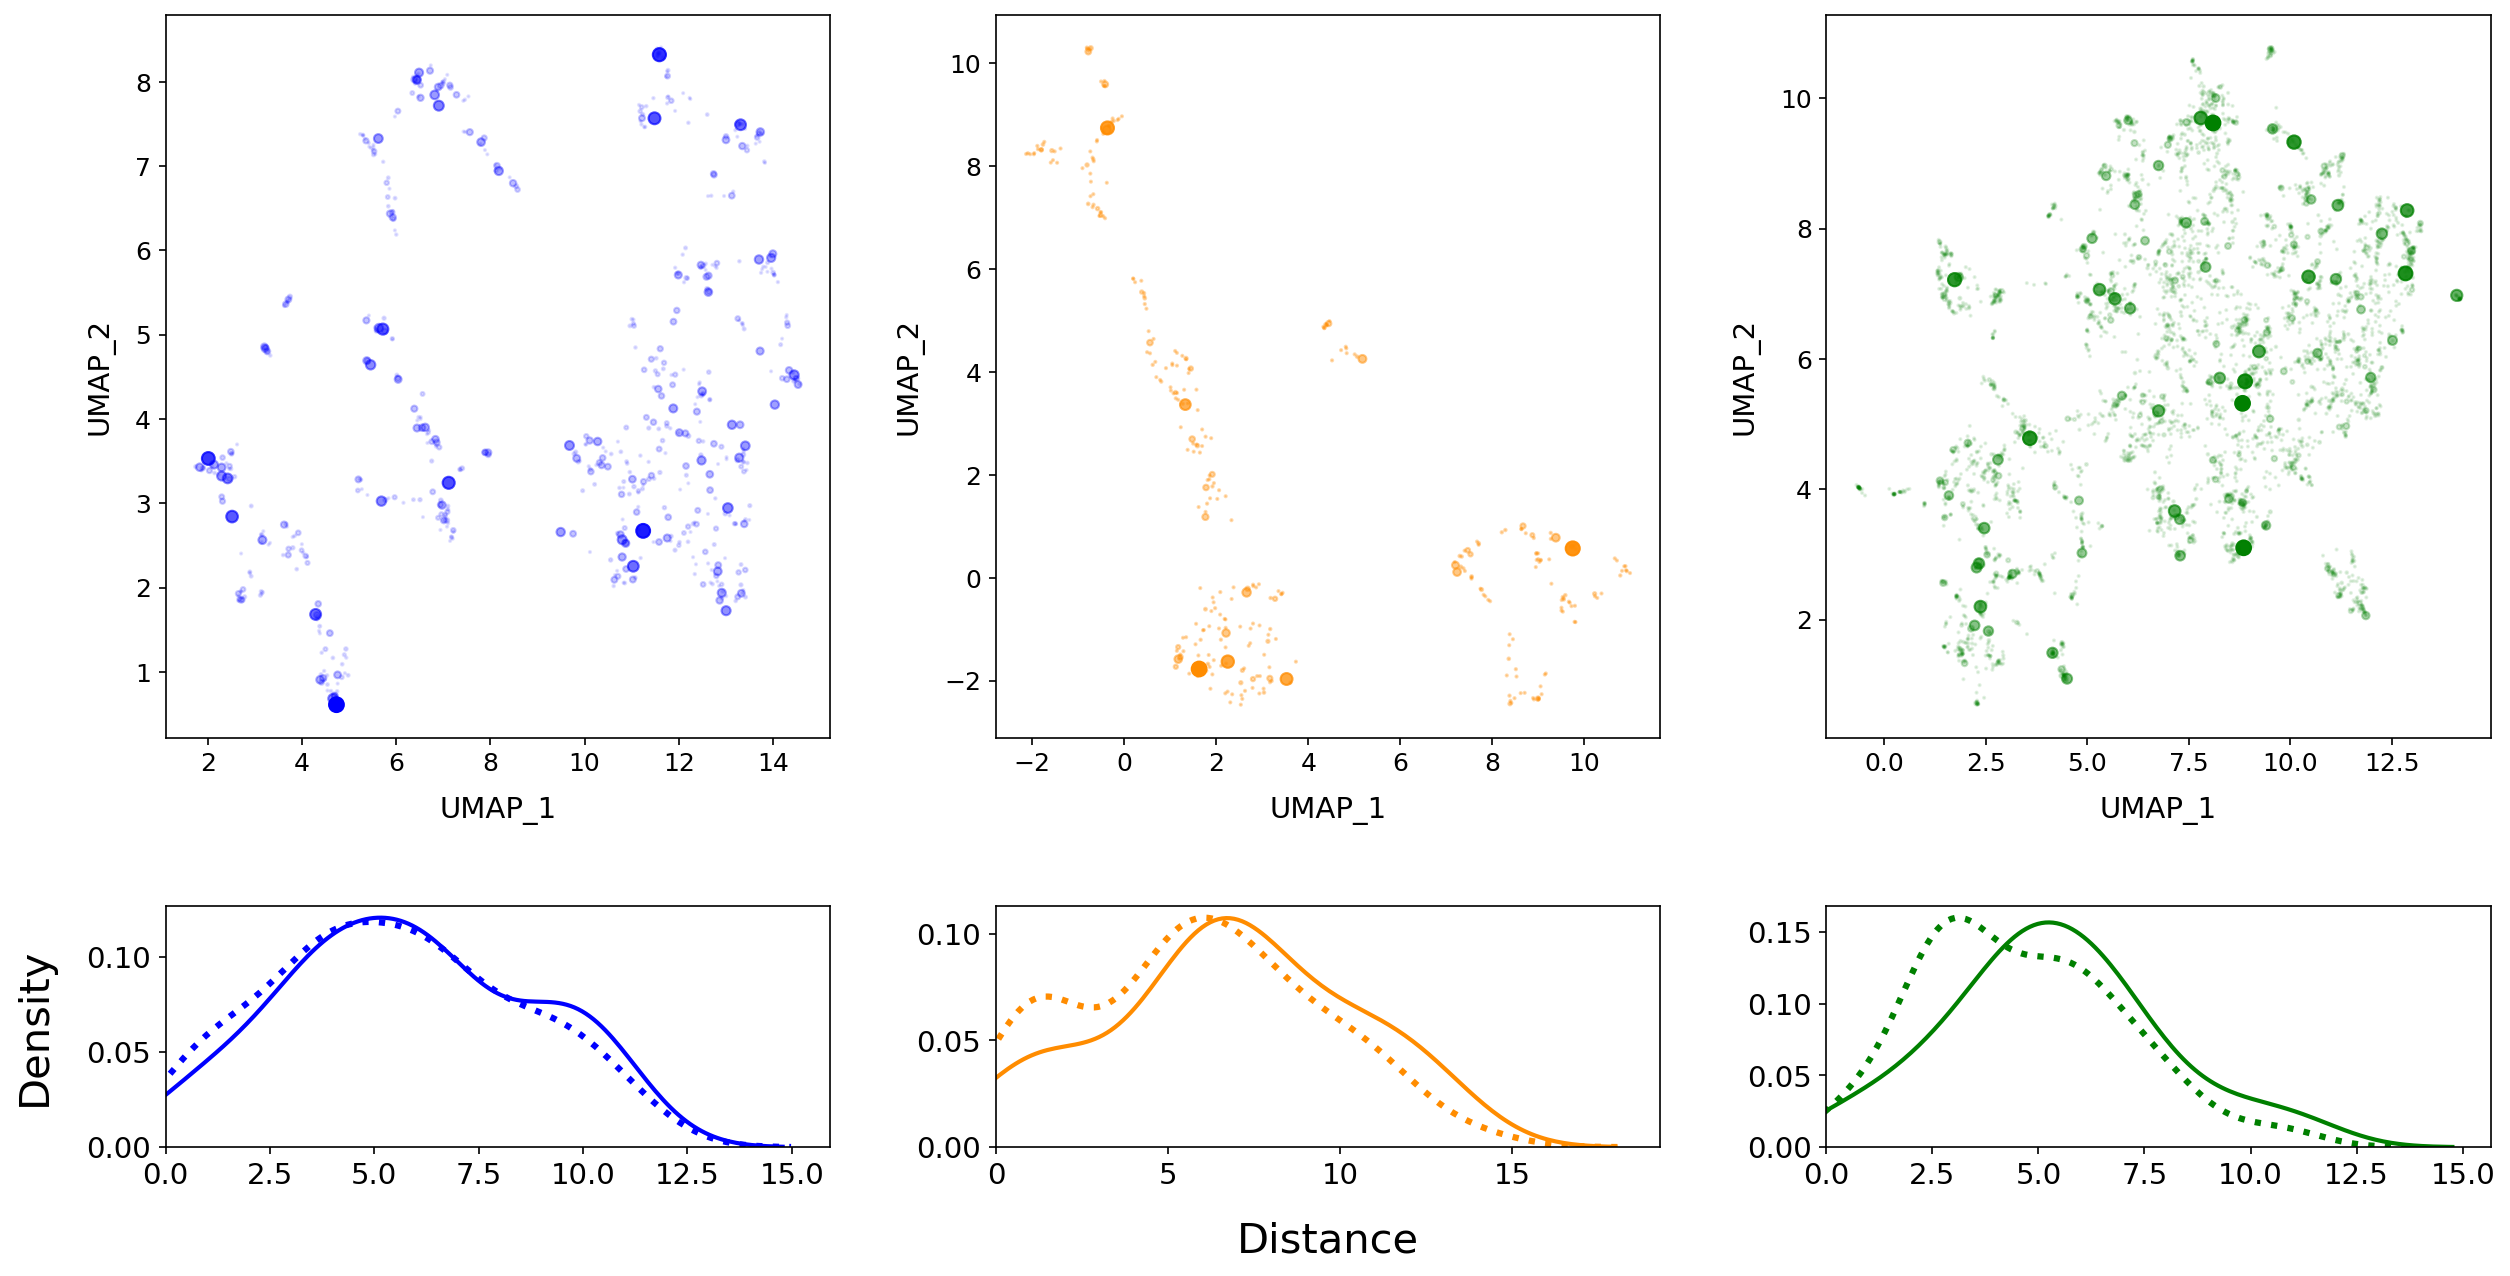

In [27]:
trans2D_bb1 = umap_transform(bb1_dist_2D)
trans2D_bb2 = umap_transform(bb2_dist_2D)
trans2D_bb3 = umap_transform(bb3_dist_2D)

fig, _, _, _ = plot_umap(bb1_pactive, bb2_pactive, bb3_pactive, trans2D_bb1, trans2D_bb2, trans2D_bb3)
#fig.savefig('figures/images/2D_sim.png')

#### Get Tanimoto and UMAP distance for building blocks in the same P(active) bin

In [28]:
bb1_dist_bins_2D = get_dist_bins(bb1_pactive, trans2D_bb1, bb1_dist_2D, bb_pos='bb1')
bb1_dist_bins_3D = get_dist_bins(bb1_pactive, trans_bb1, bb1_dist_3D, bb_pos='bb1')
#array_to_latex.to_ltx(bb1_dist_bins_2D, frmt='{:.4f}', arraytype='tabular')
#array_to_latex.to_ltx(bb1_dist_bins_3D, frmt='{:.4f}', arraytype='tabular')

In [29]:
bb2_dist_bins_2D = get_dist_bins(bb2_pactive, trans2D_bb2, bb2_dist_2D, bb_pos='bb2')
bb2_dist_bins_3D = get_dist_bins(bb2_pactive, trans_bb2, bb2_dist_3D, bb_pos='bb2')
#array_to_latex.to_ltx(bb2_dist_bins_2D, frmt='{:.4f}', arraytype='tabular')
#array_to_latex.to_ltx(bb2_dist_bins_3D, frmt='{:.4f}', arraytype='tabular')

In [30]:
bb3_dist_bins_2D = get_dist_bins(bb3_pactive, trans2D_bb3, bb3_dist_2D, bb_pos='bb3')
bb3_dist_bins_3D = get_dist_bins(bb3_pactive, trans_bb3, bb3_dist_3D, bb_pos='bb3')
#array_to_latex.to_ltx(bb3_dist_bins_2D, frmt='{:.4f}', arraytype='tabular')
#array_to_latex.to_ltx(bb3_dist_bins_3D, frmt='{:.4f}', arraytype='tabular')

### Cluster with HDBSCAN

In [31]:
sil_params_bb1 = find_optimal_hdbscan(trans_bb1.embedding_, method='silhouette')
ch_params_bb1 = find_optimal_hdbscan(trans_bb1.embedding_, method='calinski_harabasz_score')
db_params_bb1 = find_optimal_hdbscan(trans_bb1.embedding_, method='davies_bouldin_score')
obj_params_bb1 = hdbscan_param_search(bb1_pactive, trans_bb1)
bb1_best_params = optimal_params(obj_params_bb1)

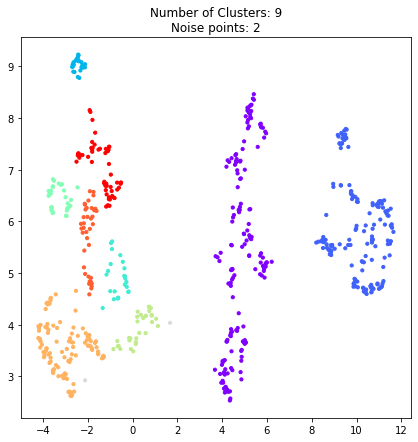

In [32]:
bb1_pactive = plot_hdbscan(bb1_pactive, bb1_best_params, trans_bb1)

In [33]:
sil_params_bb2 = find_optimal_hdbscan(trans_bb2.embedding_, method='silhouette')
ch_params_bb2 = find_optimal_hdbscan(trans_bb2.embedding_, method='calinski_harabasz_score')
db_params_bb2 = find_optimal_hdbscan(trans_bb2.embedding_, method='davies_bouldin_score')
obj_params_bb2 = hdbscan_param_search(bb2_pactive, trans_bb2)
bb2_best_params = optimal_params(obj_params_bb2)

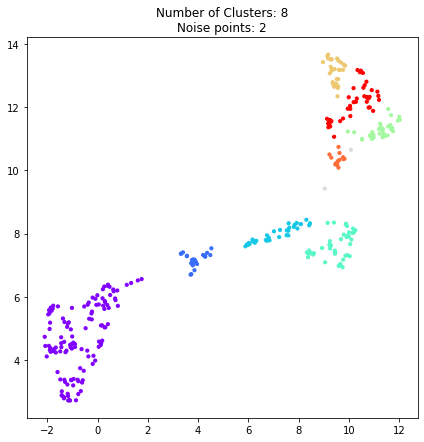

In [34]:
bb2_pactive = plot_hdbscan(bb2_pactive, bb2_best_params, trans_bb2)

In [35]:
sil_params_bb3 = find_optimal_hdbscan(trans_bb3.embedding_, method='silhouette')
ch_params_bb3 = find_optimal_hdbscan(trans_bb3.embedding_, method='calinski_harabasz_score')
db_params_bb3 = find_optimal_hdbscan(trans_bb3.embedding_, method='davies_bouldin_score')
obj_params_bb3 = hdbscan_param_search(bb3_pactive, trans_bb3)
bb3_best_params = optimal_params(obj_params_bb3)

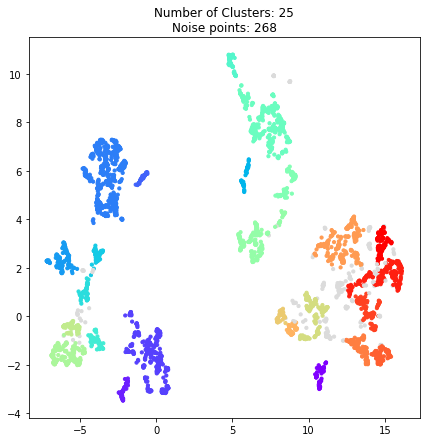

In [36]:
bb3_pactive = plot_hdbscan(bb3_pactive, bb3_best_params, trans_bb3)

#### Plot objective function

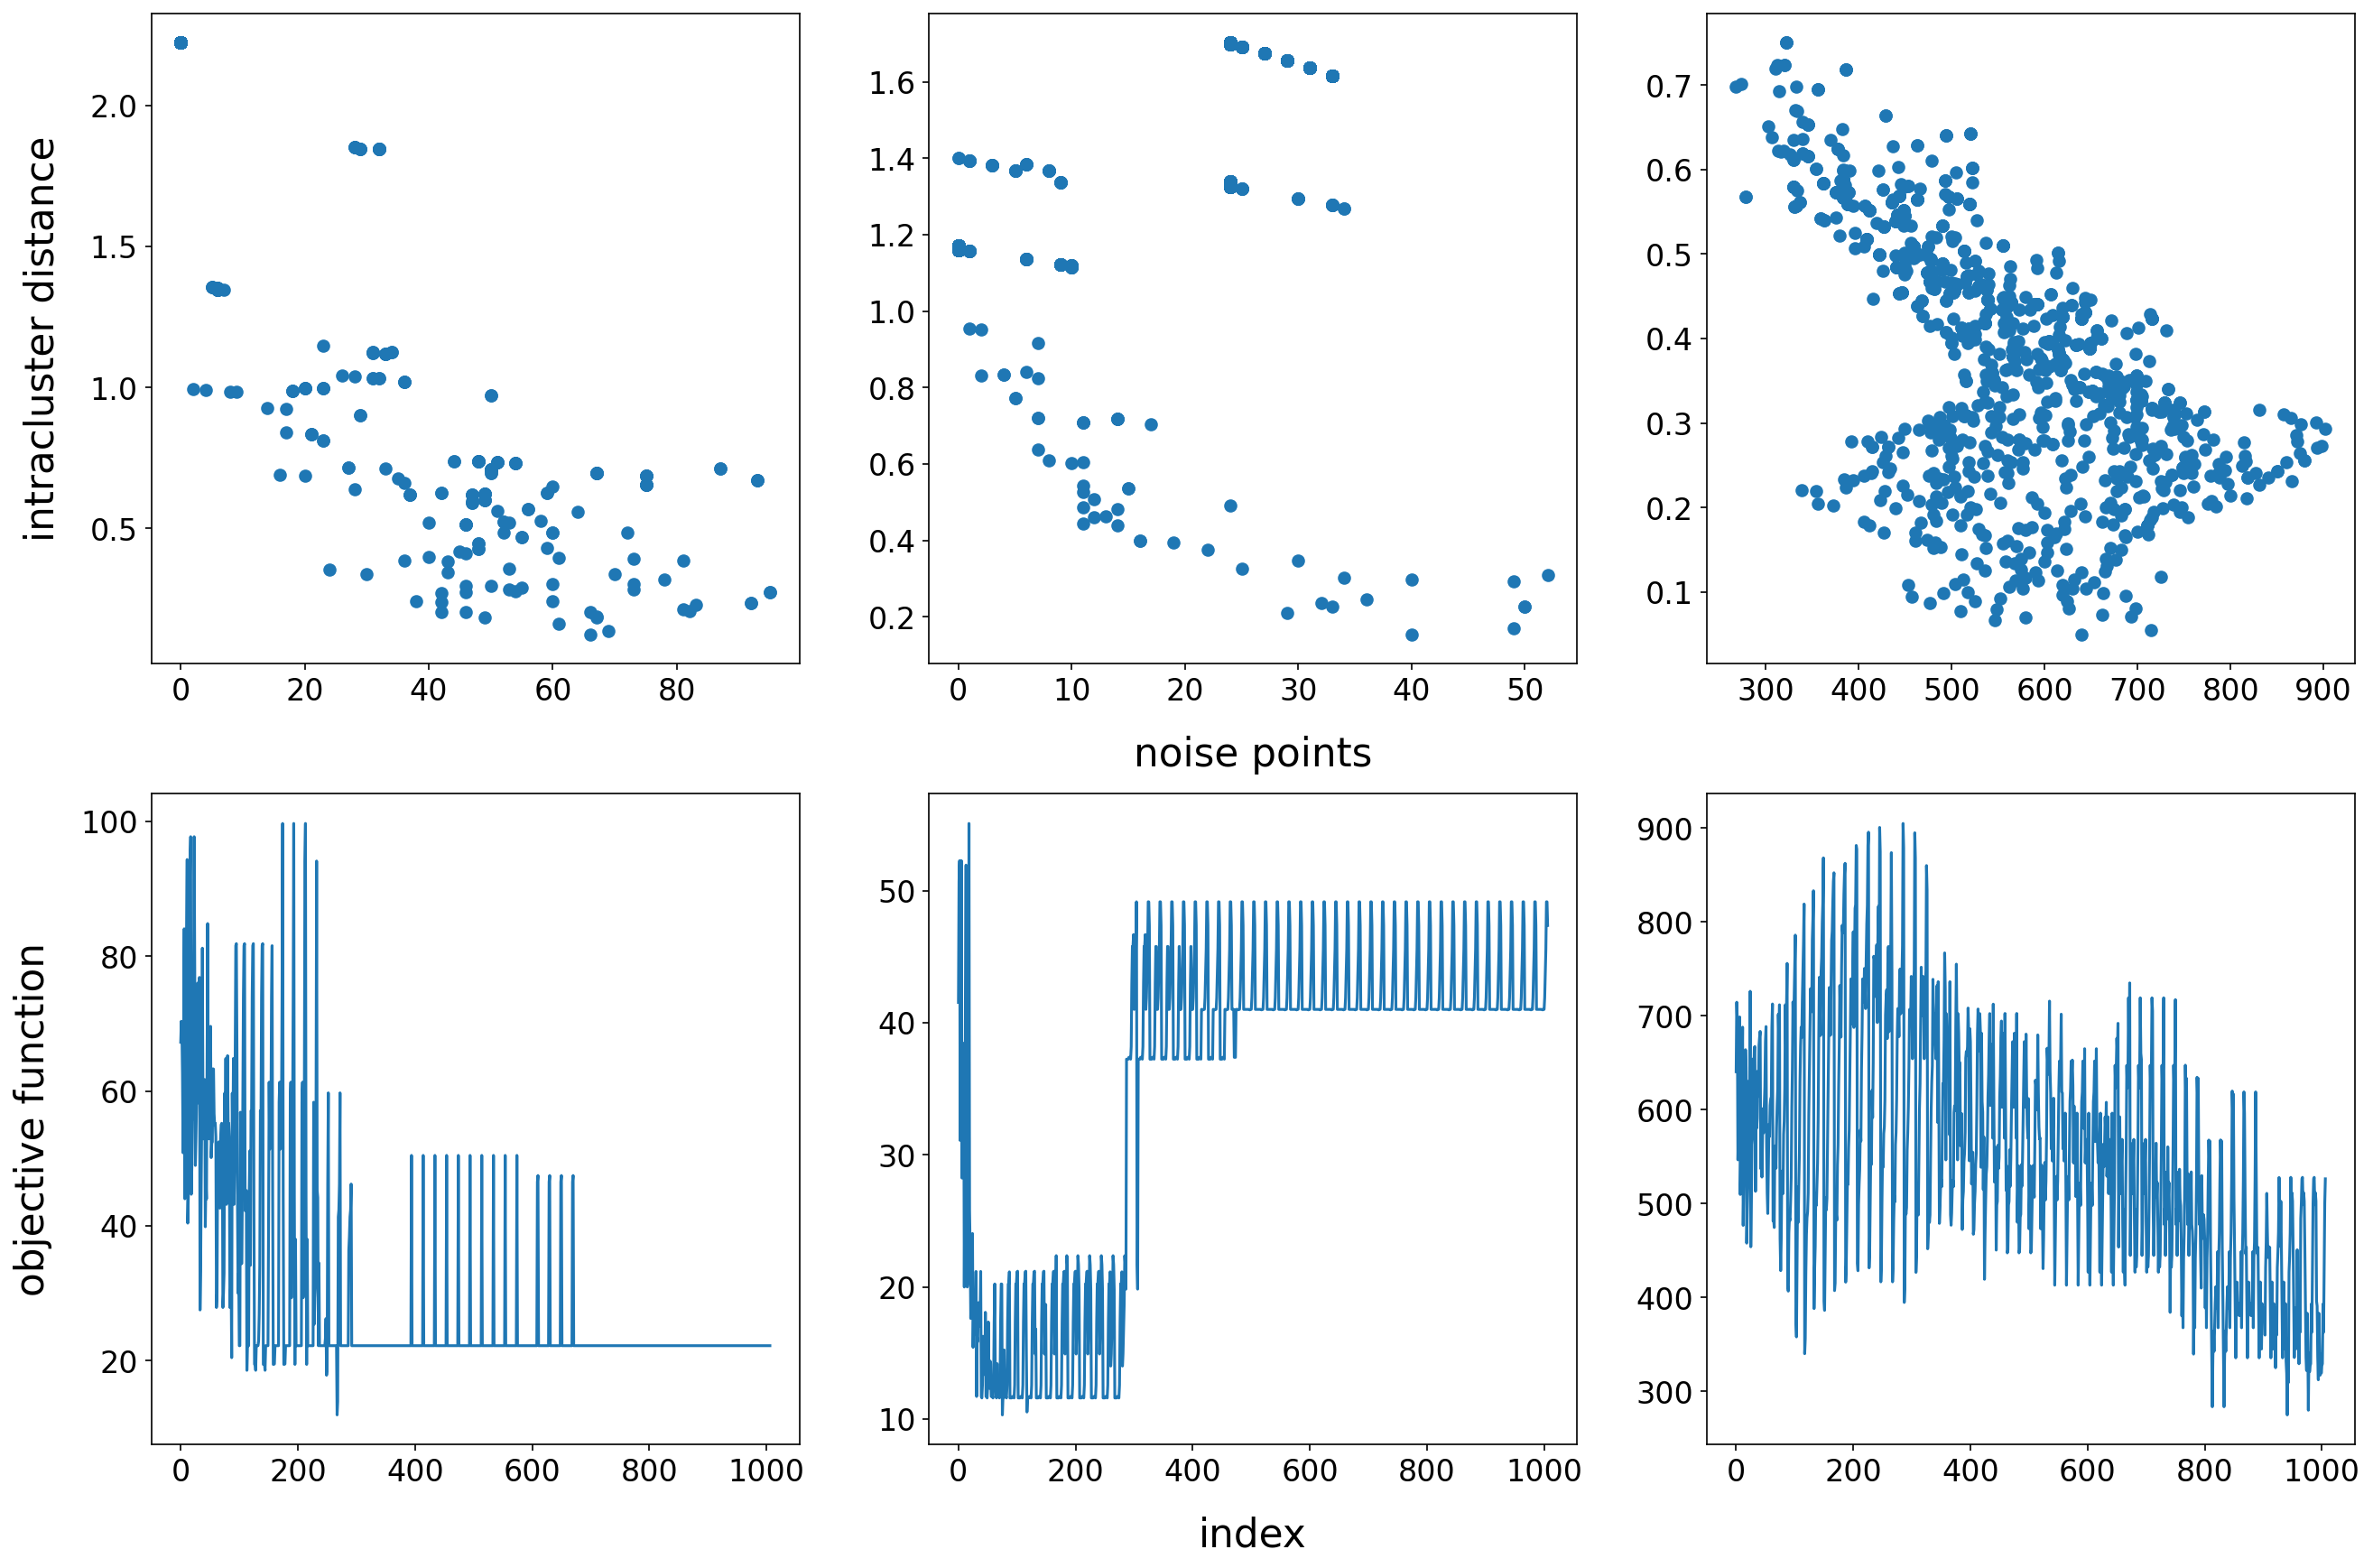

In [37]:
fig, axs = plt.subplots(2, 3, figsize=(21,14), dpi=150)
axs[0][0].scatter(obj_params_bb1['n_noise'], obj_params_bb1['icd'])
axs[0][1].scatter(obj_params_bb2['n_noise'], obj_params_bb2['icd'])
axs[0][2].scatter(obj_params_bb3['n_noise'], obj_params_bb3['icd'])
axs[0][1].set_xlabel('noise points', fontsize=21, labelpad=15)
axs[0][0].set_ylabel('intracluster distance', fontsize=21, labelpad=15)
axs[0][0].tick_params(labelsize=16)
axs[0][1].tick_params(labelsize=16)
axs[0][2].tick_params(labelsize=16)

axs[1][0].plot(obj(obj_params_bb1))
axs[1][1].plot(obj(obj_params_bb2))
axs[1][2].plot(obj(obj_params_bb3))
axs[1][1].set_xlabel('index', fontsize=21, labelpad=15)
axs[1][0].set_ylabel('objective function', fontsize=21, labelpad=15)
axs[1][0].tick_params(labelsize=16)
axs[1][1].tick_params(labelsize=16)
axs[1][2].tick_params(labelsize=16)
#fig.savefig('../SI/figures/images/obj_func.png')
plt.show()

#### View interactive plots with compound structures (mouse-over point)

In [38]:
#plot_hdbscan_interactive(bb1_pactive, bb1_best_params, trans_bb1, bb_pos='bb1')
#plot_hdbscan_interactive(bb2_pactive, bb2_best_params, trans_bb2, bb_pos='bb2')
#plot_hdbscan_interactive(bb3_pactive, bb3_best_params, trans_bb3, bb_pos='bb3')

### Aggregate by cluster

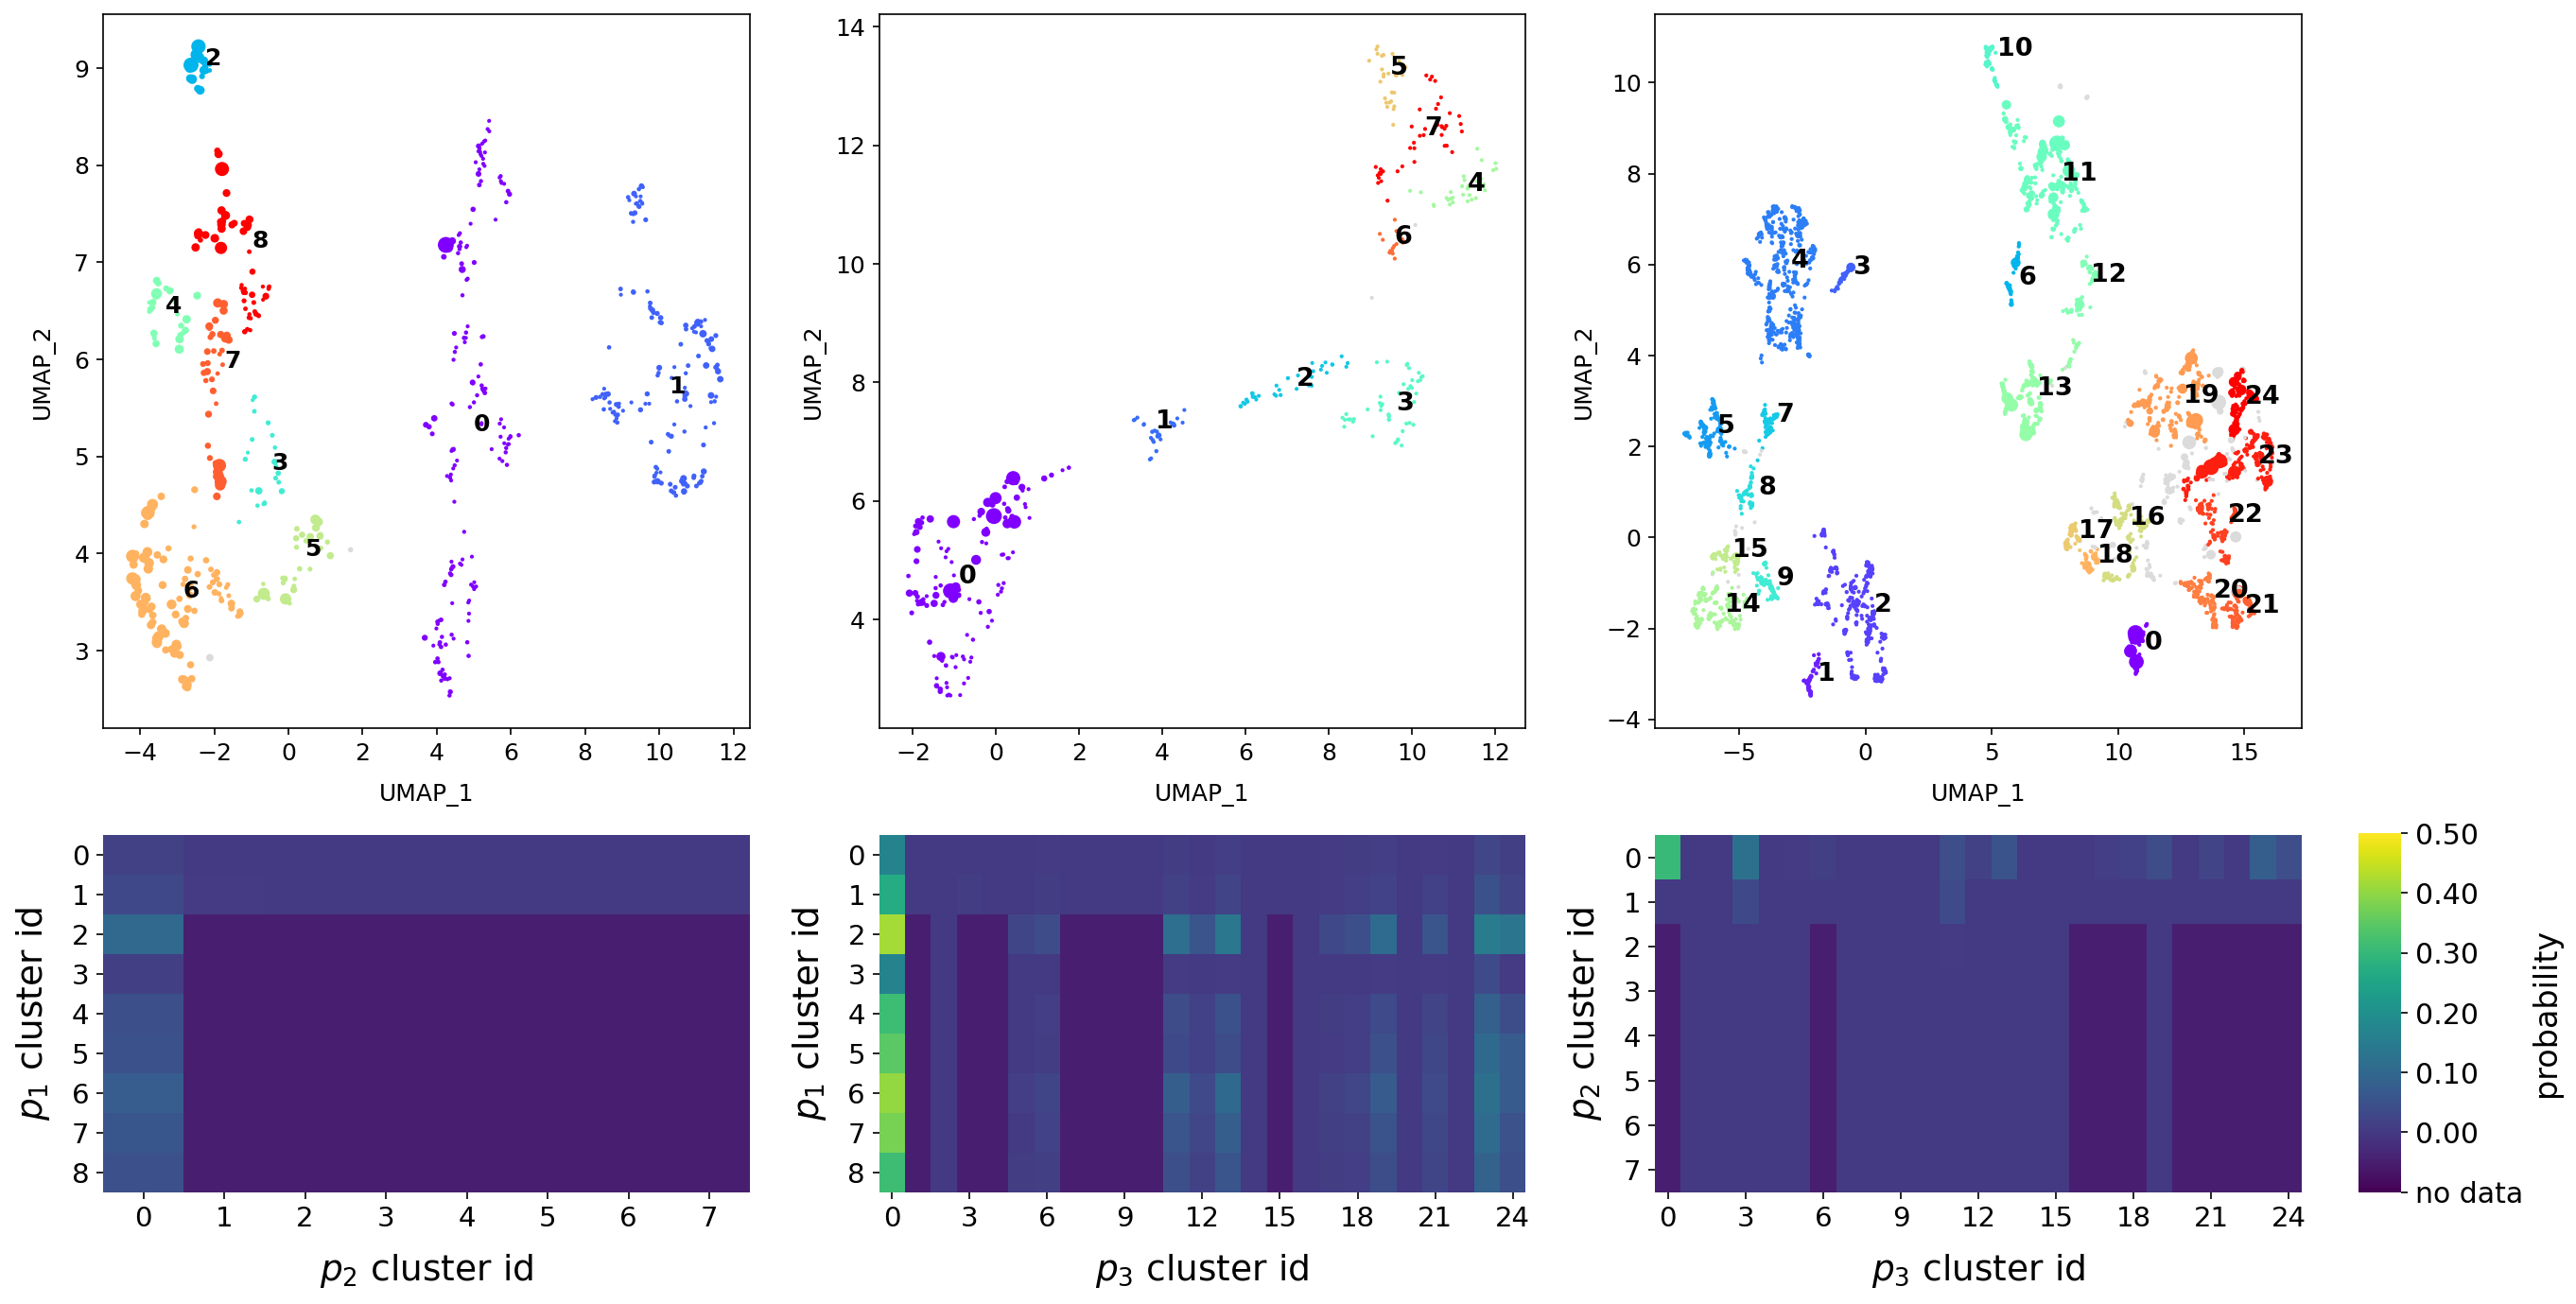

In [39]:
p_12, p_13, p_23 = plot_cluster_combos(total_compounds, bb1_pactive, bb2_pactive, bb3_pactive, trans_bb1, trans_bb2, trans_bb3)


In [40]:
# array_to_latex.to_ltx(p_12, frmt='{:.4f}', arraytype='tabular')
# array_to_latex.to_ltx(p_13[:, :12], frmt='{:.4f}', arraytype='tabular')
# array_to_latex.to_ltx(p_13[:, 12:], frmt='{:.4f}', arraytype='tabular')
# array_to_latex.to_ltx(p_23[:, :12], frmt='{:.4f}', arraytype='tabular')
# array_to_latex.to_ltx(p_23[:, 12:], frmt='{:.4f}', arraytype='tabular')

### Distribution of P(active) values and building blocks in each cluster

In [41]:
bb1_cluster, bb1_data = cluster_rep(bb1_pactive, bb_pos='bb1')
bb2_cluster, bb2_data = cluster_rep(bb2_pactive, bb_pos='bb2')
bb3_cluster, bb3_data = cluster_rep(bb3_pactive, bb_pos='bb3')

In [42]:
bb1_random = gen_random_cluster(bb1_pactive)
bb2_random = gen_random_cluster(bb2_pactive)
bb3_random = gen_random_cluster(bb3_pactive)

In [43]:
## Calculate FWHM for bbs with P(active) > 0
bb1_active = bb1_pactive.loc[bb1_pactive['P(active)'] > 0].reset_index()
bb1_fwhm = pd.DataFrame(calc_fwhm(bb1_active).items(), columns=['Cluster', 'FWHM']).assign(random=False)

bb2_active = bb2_pactive.loc[bb2_pactive['P(active)'] > 0].reset_index()
bb2_fwhm = pd.DataFrame(calc_fwhm(bb2_active).items(), columns=['Cluster', 'FWHM']).assign(random=False)

bb3_active = bb3_pactive.loc[bb3_pactive['P(active)'] > 0].reset_index()
bb3_fwhm = pd.DataFrame(calc_fwhm(bb3_active).items(), columns=['Cluster', 'FWHM']).assign(random=False)

In [44]:
bb1_t, bb1_rand_fwhm = fwhm_ttest(bb1_active, bb1_fwhm, N=50)
print(bb1_t)
bb2_t, bb2_rand_fwhm = fwhm_ttest(bb2_active, bb2_fwhm, N=50)
print(bb2_t)
bb3_t, bb3_rand_fwhm = fwhm_ttest(bb3_active, bb3_fwhm, N=50)
print(bb3_t)

Ttest_indResult(statistic=0.20400770863802473, pvalue=0.8409197345704633)
Ttest_indResult(statistic=-5.124068537704049, pvalue=0.00025155582629705437)
Ttest_indResult(statistic=-3.2820347411584683, pvalue=0.001971904752969297)


In [45]:
bb1_FWHM = pd.concat([bb1_fwhm, bb1_rand_fwhm])
bb2_FWHM = pd.concat([bb2_fwhm, bb2_rand_fwhm])
bb3_FWHM = pd.concat([bb3_fwhm, bb3_rand_fwhm])

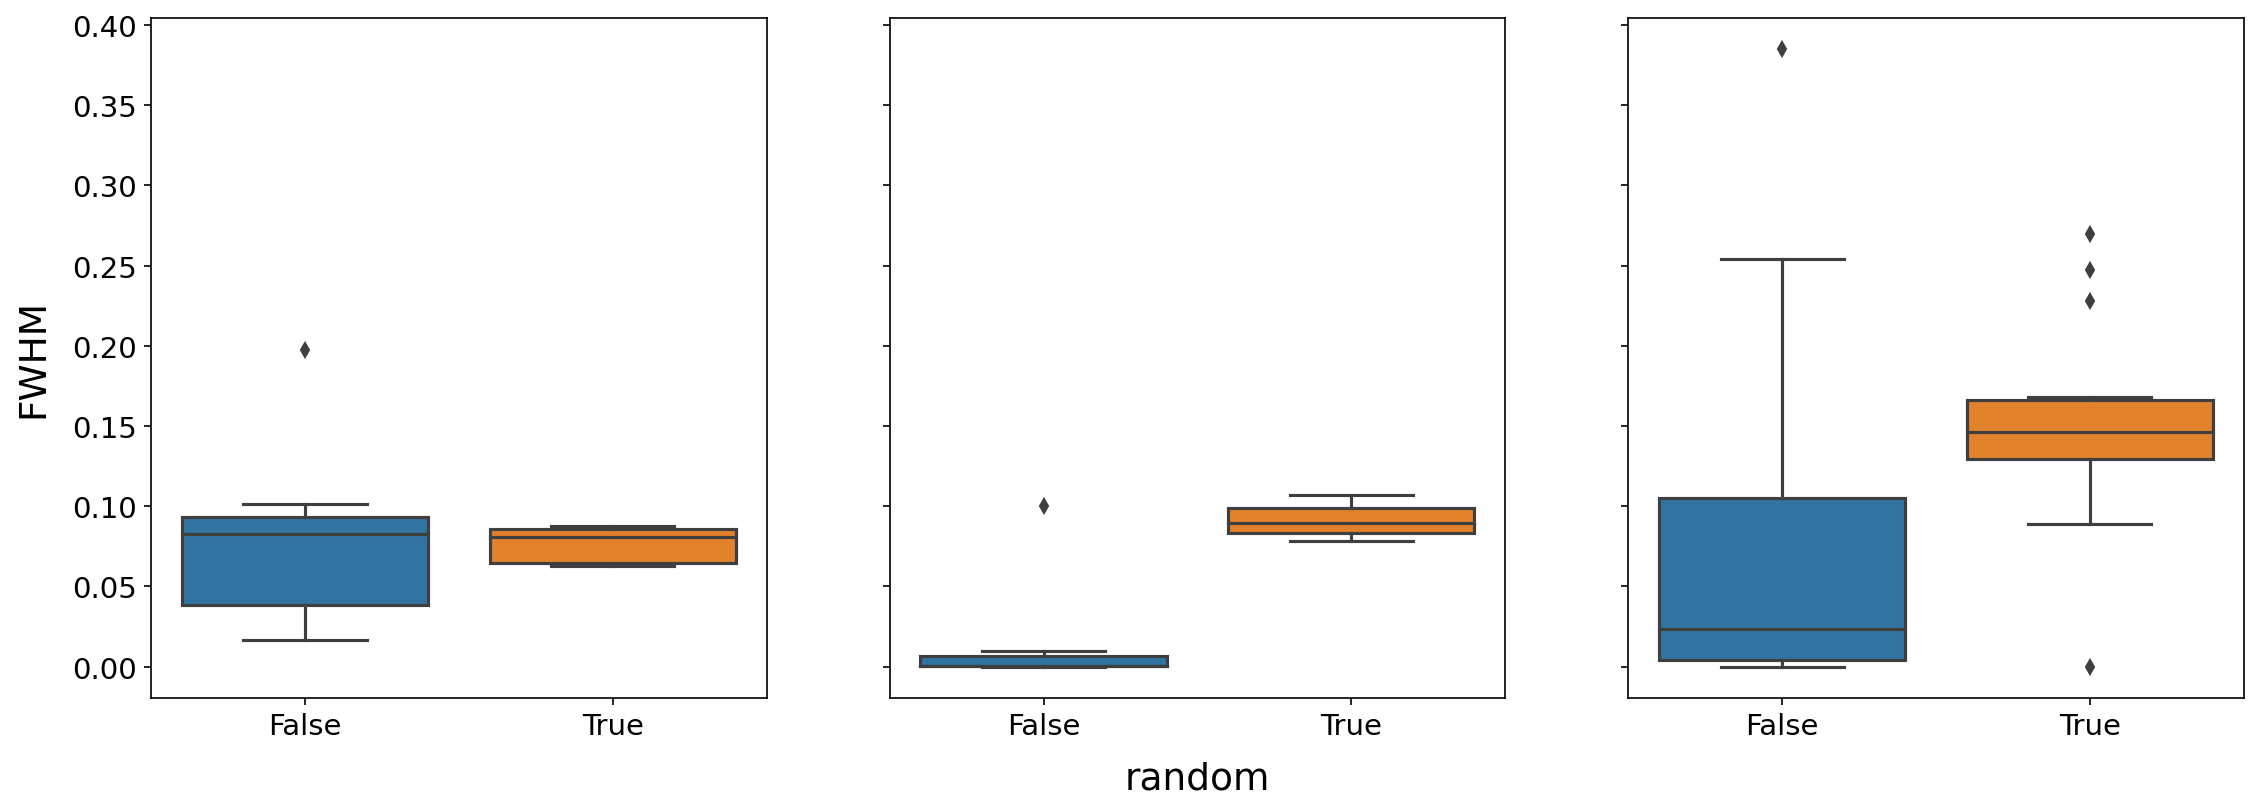

In [46]:
fig, axs = plt.subplots(1, 3, dpi=150, figsize=(18,6), sharey=True)
lfs = 18
tfs = 14
sns.boxplot(x='random', y='FWHM', data=bb1_FWHM, ax=axs[0])
sns.boxplot(x='random', y='FWHM', data=bb2_FWHM, ax=axs[1])
sns.boxplot(x='random', y='FWHM', data=bb3_FWHM, ax=axs[2])
axs[0].set_xlabel("")
axs[0].tick_params(labelsize=tfs)
axs[0].set_ylabel("FWHM", labelpad=10, fontsize=lfs)
axs[1].tick_params(labelsize=tfs)
axs[1].set_xlabel("random", labelpad=10, fontsize=lfs)
axs[1].set_ylabel("")
axs[2].tick_params(labelsize=tfs)
axs[2].set_xlabel("")
axs[2].set_ylabel("")
plt.show()
#fig.savefig('figures/images/FWHM_boxplot.png')

0.19763733673519474


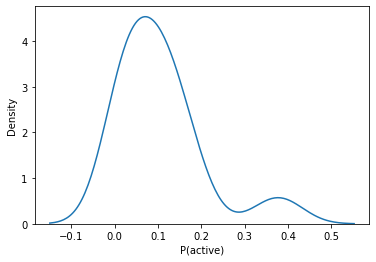

In [47]:
kde = sns.kdeplot(bb1_active.loc[bb1_active['Cluster'] == 2, 'P(active)'])
line = kde.lines[0]
x,y = line.get_data()
print(FWHM(x,y))

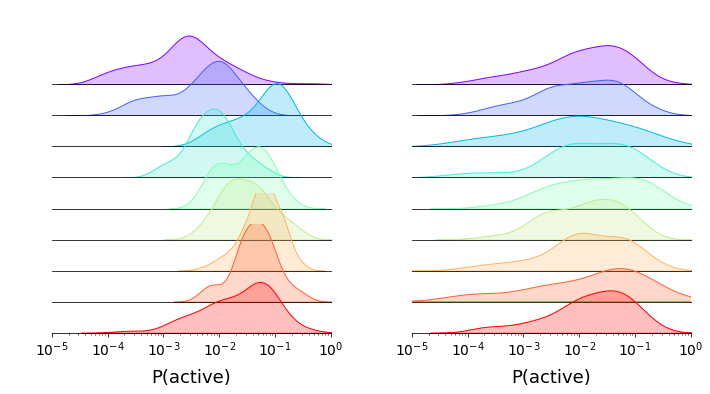

In [48]:
plot_cluster_pactive(bb1_active, bb1_random)

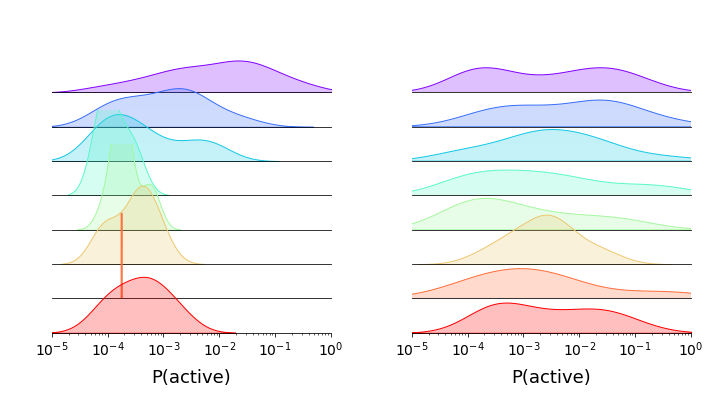

In [49]:
plot_cluster_pactive(bb2_active, bb2_random)

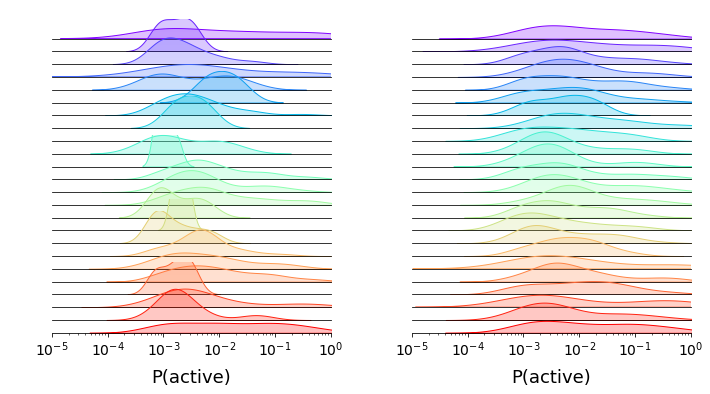

In [50]:
plot_cluster_pactive(bb3_active, bb3_random)